This notebook analyzes replicate 2 and 3 for the cell-fitness assay for KCNE1. 
The sort was done by Andrew and Lynn

The sequencing is in the following folder: /scratch2/glazeram/8184-AG

In [344]:
cd /scratch2/glazeram/8184-AG

In [102]:
setwd("/scratch2/glazeram/8184-AG/")
library(data.table)
library(dplyr)
library(ggplot2)
library(tidyr)
library(RColorBrewer)
library(gplots)
library(colorspace)
library("ggpubr")
library("gridExtra")
library("GGally")

In [103]:
ls

8184-AG-11_goodBarcodeOnly_counted.txt
8184-AG-11_goodBarcodeOnly.txt
8184-AG-11_goodBarcodeUMI2_counts.txt
8184-AG-11_goodBarcodeUMI_counted2.txt
8184-AG-11_goodBarcodeUMI_counted3.txt
8184-AG-11_goodBarcodeUMI_counted.txt
8184-AG-11_goodBarcodeUMI.txt
8184-AG-11_R1.txt
8184-AG-12_goodBarcodeOnly_counted.txt
8184-AG-12_goodBarcodeOnly.txt
8184-AG-12_goodBarcodeUMI2_counts.txt
8184-AG-12_goodBarcodeUMI_counted2.txt
8184-AG-12_goodBarcodeUMI_counted3.txt
8184-AG-12_goodBarcodeUMI_counted.txt
8184-AG-12_goodBarcodeUMI.txt
8184-AG-12_R1.txt
8184-AG-13_goodBarcodeOnly_counted.txt
8184-AG-13_goodBarcodeOnly.txt
8184-AG-13_goodBarcodeUMI2_counts.txt
8184-AG-13_goodBarcodeUMI_counted2.txt
8184-AG-13_goodBarcodeUMI_counted3.txt
8184-AG-13_goodBarcodeUMI_counted.txt
8184-AG-13_goodBarcodeUMI.txt
8184-AG-13_R1.txt
8184-AG_project_summary.xlsx
counter.tmp
Counts
countUMIs.sh
countUMIs.sh~
Fastqc
funcscores-allreps-norm-2022-10-21.pdf
funcscores-allreps-norm-nonsenseonly2022-10-21.pdf
funcscores-a

Andrew ran the R1_eval_v1.py and readcounter.sh scripts for this project. the counted results are in the following files: 

"can ask Andrew for the numbers here"

* 8184-AG-11_goodBarcodeOnly_counted.txt
* 8184-AG-12_goodBarcodeOnly_counted.txt
* 8184-AG-13_goodBarcodeOnly_counted.txt

In [104]:
# Switch to R

time1 <- fread("8184-AG-11_goodBarcodeOnly_counted.txt", header=F, stringsAsFactors = F)
time2 <- fread("8184-AG-12_goodBarcodeOnly_counted.txt", header=F, stringsAsFactors = F)
time3 <- fread("8184-AG-13_goodBarcodeOnly_counted.txt", header=F, stringsAsFactors = F)

head(time1)
head(time2)
head(time3)

V1,V2
<chr>,<int>
TATATTCATGATTGTCAT,1
TAATGACGAGCTTCAATT,1
GAGTTGCTCGTAAAGTGT,1
GGAGGGGTACGGTGGTCG,1
GATAGTGATTTATAAACT,10
AAAACTTTGGACCAGGTG,1


V1,V2
<chr>,<int>
TATCGCAGAGTTCGGTGC,2360
GGCAGCTTCAGGACGGTA,1
CATTCGTTGGCCGGCTTC,2
GTATTTCTGTGAAGGAGG,1
TCCCACTGTTACACATGC,1
GTCGGCGGATCGGTCAGC,3


V1,V2
<chr>,<int>
CCGACGATAAAGAACTTA,2
CATTCGTTGGCCGGCTTC,2
ATCGTAAGGAGTTTCGCG,1
TATCGCAGAGTTCGGTGC,2159
TCCCACTGTTACACATGC,1
GTCGGCGGATCGGTCAGC,1


In [105]:
all_times <- full_join(time1,time2,by="V1") %>% full_join(.,time3, by="V1")

head(all_times)

V1,V2.x,V2.y,V2
<chr>,<int>,<int>,<int>
TATATTCATGATTGTCAT,1,NA,NA
TAATGACGAGCTTCAATT,1,NA,NA
GAGTTGCTCGTAAAGTGT,1,NA,NA
GGAGGGGTACGGTGGTCG,1,3,NA
GATAGTGATTTATAAACT,10,1,NA
AAAACTTTGGACCAGGTG,1,NA,NA


In [106]:
colnames(all_times) = c("barcode","Seq11","Seq12","Seq13")

In [107]:
#total counts are determined by the following command: 
# awk '{a[$2]+=$1}END{for(i in a) print i,a[i]}' goodreads_counted2.txt > total_counts.txt
# directory: /scratch2/muhama1/E1_NGS_SubA_AG

sub <- fread("/scratch2/muhama1/E1_NGS_SubA_AG/total_counts.txt", header=F, stringsAsFactors = F)
head(sub)
colnames(sub)=c("barcode","totalCount")

V1,V2
<chr>,<int>
GCGTCCTTCAGCGCGTTC,3
TGCCACCTGCTTGGCCGG,19
TTAGTCTCGCGGGGTAGC,1
CACATAAATTCTTGGAGT,1
CNNCTGGGCAGTCAGTTC,1
AGGAGTTAGAGAAGGCAT,1


In [108]:
head(sub)

barcode,totalCount
<chr>,<int>
GCGTCCTTCAGCGCGTTC,3
TGCCACCTGCTTGGCCGG,19
TTAGTCTCGCGGGGTAGC,1
CACATAAATTCTTGGAGT,1
CNNCTGGGCAGTCAGTTC,1
AGGAGTTAGAGAAGGCAT,1


In [109]:
sub2 <- fread("/scratch2/muhama1/E1_NGS_SubA_AG/subA-cleanTable2022-06-29.txt", header=T, 
             stringsAsFactors=F)

sub2$barcode <- gsub("^.{0,5}", "", sub2$barcode)

subA <- left_join(sub2,sub,by="barcode")
head(subA)


barcode,orig,pos,new,mutType,totalCount
<chr>,<chr>,<int>,<chr>,<chr>,<int>
AAGAAATGCTGTCAGTCC,S,64,L,missense,109829
CGTCATGAAAGTTCTACA,Y,46,P,missense,92043
AGAGGGCTGTAAAGTGGT,L,42,I,missense,54590
CGCCAGGGCCGGGTGTGG,Q,22,M,missense,65730
AGCGGGACGCTTTTCTAC,G,52,C,missense,52477
GCAGCACGTGTGCTTTAG,F,57,D,missense,93138


In [110]:
df1 <- all_times %>% right_join(.,subA, by="barcode") %>% select(barcode, Seq11,Seq12,Seq13, 
                                                                 orig,pos,new,mutType,totalCount)


head(df1)

barcode,Seq11,Seq12,Seq13,orig,pos,new,mutType,totalCount
<chr>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<int>
TCTGTCGATTATTTCCTC,3878,526,70,Y,65,M,missense,4225
GAGCTTGTTCACGTGTTG,97,32,129,R,98,S,missense,4367
ATGGGTCCAAGTTCACGT,429,NA,NA,L,113,Q,missense,11594
AACCTTAAAGAGCGGCCT,62,NA,158,P,11,A,missense,3491
GATAGCTGTCGATGTCAG,4194,514,900,V,80,G,missense,8469
TGATCAGTCCTCGATCTC,89,NA,NA,G,52,T,missense,5803


In [111]:
nrow(df1)

[1] 80276

In [112]:
sum(is.na(df1$mutType))
nrow(df1)

[1] 0

[1] 80276

In [113]:
df1$Seq11.adj = 1e6 * (df1$Seq11/(sum(df1$Seq11, na.rm = T)))

df1$Seq12.adj = 1e6 * (df1$Seq12/(sum(df1$Seq12, na.rm = T)))

df1$Seq13.adj = 1e6 * (df1$Seq13/(sum(df1$Seq13, na.rm = T)))

# Of note, the total count is from the subA
# the tot.adj is the adjusted total count from subA 
df1$tot.adj = 1e6 * (df1$totalCount/(sum(df1$totalCount, na.rm = T)))

head(df1)

df1$mut=paste(df1$orig,df1$pos,df1$new,sep="")

barcode,Seq11,Seq12,Seq13,orig,pos,new,mutType,totalCount,Seq11.adj,Seq12.adj,Seq13.adj,tot.adj
<chr>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
TCTGTCGATTATTTCCTC,3878,526,70,Y,65,M,missense,4225,77.316971,24.426013,3.816457,7.383042
GAGCTTGTTCACGTGTTG,97,32,129,R,98,S,missense,4367,1.933921,1.485993,7.033186,7.631182
ATGGGTCCAAGTTCACGT,429,NA,NA,L,113,Q,missense,11594,8.553115,NA,NA,20.260116
AACCTTAAAGAGCGGCCT,62,NA,158,P,11,A,missense,3491,1.236115,NA,8.614290,6.100402
GATAGCTGTCGATGTCAG,4194,514,900,V,80,G,missense,8469,83.617168,23.868766,49.068738,14.799286
TGATCAGTCCTCGATCTC,89,NA,NA,G,52,T,missense,5803,1.774422,NA,NA,10.140543


In [114]:
num1 <- aggregate(Seq11.adj~mut, data=df1, FUN=sum)
num2 <- aggregate(Seq12.adj~mut, data=df1, FUN=sum)
num3 <- aggregate(Seq13.adj~mut, data=df1, FUN=sum)
num4 <- aggregate(tot.adj~mut, data=df1, FUN=sum)

head(num1)

,mut,Seq11.adj
,<chr>,<dbl>
1,A114A,80.18795
2,A114C,25.16091
3,A114D,50.76045
4,A114E,93.08740
5,A114F,37.86099
6,A114G,148.41349


In [115]:
df2 <- full_join(num1, num2) %>% full_join(.,num3) %>% full_join(.,num4)

Joining, by = "mut"

Joining, by = "mut"

Joining, by = "mut"



In [116]:
head(df2)

,mut,Seq11.adj,Seq12.adj,Seq13.adj,tot.adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,A114A,80.18795,73.788849,81.0179386,861.7749
2,A114C,25.16091,36.221084,28.8960346,304.5937
3,A114D,50.76045,87.673598,6.3244151,406.8205
4,A114E,93.08740,37.799952,5.8882486,363.8276
5,A114F,37.86099,5.200976,0.8723331,149.7386
6,A114G,148.41349,37.846389,96.9380181,1154.8039


In [117]:
df2$mutation = df2$mut
df2 <- separate(df2,mut,c("orig","pos","new"),sep=c(1,-1),convert=T)

head(df2)

,orig,pos,new,Seq11.adj,Seq12.adj,Seq13.adj,tot.adj,mutation
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,A,114,A,80.18795,73.788849,81.0179386,861.7749,A114A
2,A,114,C,25.16091,36.221084,28.8960346,304.5937,A114C
3,A,114,D,50.76045,87.673598,6.3244151,406.8205,A114D
4,A,114,E,93.08740,37.799952,5.8882486,363.8276,A114E
5,A,114,F,37.86099,5.200976,0.8723331,149.7386,A114F
6,A,114,G,148.41349,37.846389,96.9380181,1154.8039,A114G


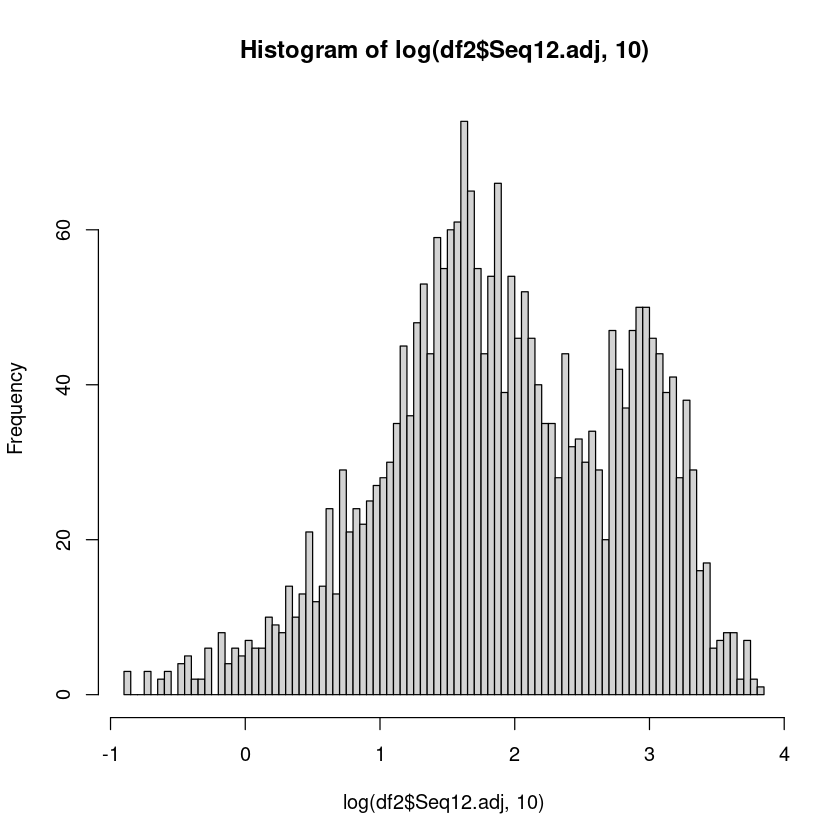

In [118]:
hist(log(df2$Seq12.adj,10), breaks=100)

In [119]:
df2$cat = ifelse(df2$orig==df2$new,"syn",ifelse(df2$new =="X", "ns","ms")) 

df2$cat2 = ifelse(df2$cat =="ns" & df2$pos <58, "earlyns",df2$cat)

df2$cat2 = ifelse(df2$cat =="ns" & df2$pos >57, "latens",df2$cat)

In [120]:
df2$score.time1.total = log((df2$Seq11.adj+10)/(df2$tot.adj+10),2)

df2$score.time2.total = log((df2$Seq12.adj+10)/(df2$tot.adj+10),2)

df2$score.time3.total = log((df2$Seq13.adj+10)/(df2$tot.adj+10),2)

In [121]:
head(df2)

,orig,pos,new,Seq11.adj,Seq12.adj,Seq13.adj,tot.adj,mutation,cat,cat2,score.time1.total,score.time2.total,score.time3.total
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,A,114,A,80.18795,73.788849,81.0179386,861.7749,A114A,syn,syn,-3.272949,-3.379125,-3.259733
2,A,114,C,25.16091,36.221084,28.8960346,304.5937,A114C,ms,ms,-3.161446,-2.766867,-3.015795
3,A,114,D,50.76045,87.673598,6.3244151,406.8205,A114D,ms,ms,-2.778222,-2.093386,-4.674323
4,A,114,E,93.08740,37.799952,5.8882486,363.8276,A114E,ms,ms,-1.858505,-2.967292,-4.556341
5,A,114,F,37.86099,5.200976,0.8723331,149.7386,A114F,ms,ms,-1.738791,-3.393477,-3.876979
6,A,114,G,148.41349,37.846389,96.9380181,1154.8039,A114G,ms,ms,-2.878320,-4.605533,-3.445240


Warning message:
“Removed 146 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 162 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 150 rows containing non-finite values (stat_ydensity).”


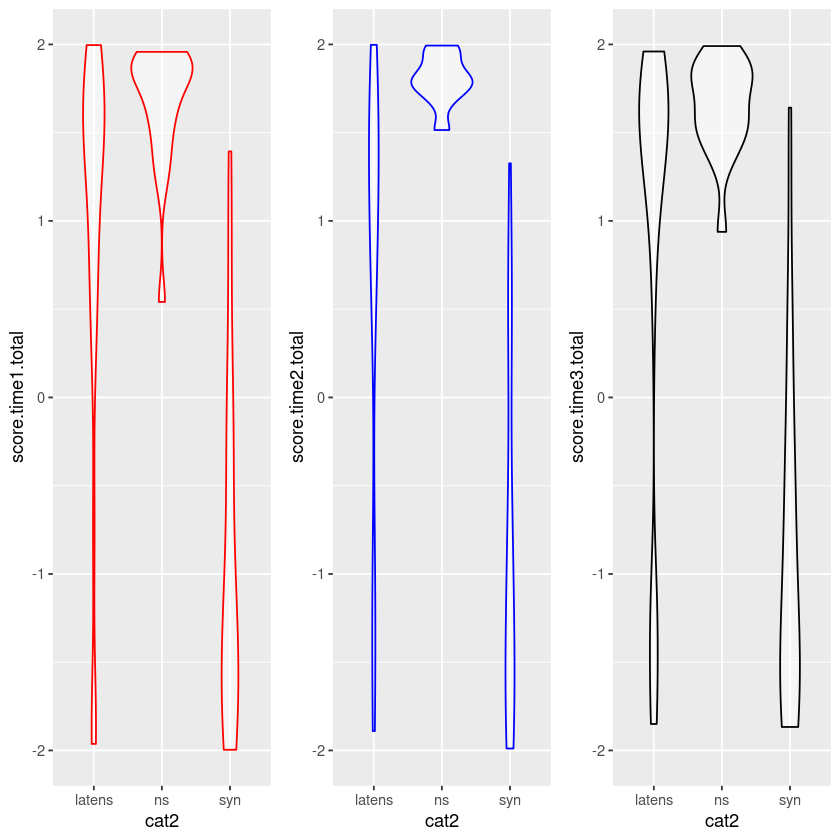

In [122]:
p1 <- ggplot(df2[df2$cat!="ms",], aes(cat2,score.time1.total))+geom_violin(col="red", alpha =0.5)+
    ylim(-2,2)

p2 <- ggplot(data=df2[df2$cat!="ms",], aes(cat2,score.time2.total))+geom_violin(col="blue",alpha=0.5)+
    ylim(-2,2)
    
p3 <- ggplot(data=df2[df2$cat!="ms",], aes(cat2,score.time3.total))+geom_violin(col="black",alpha=0.5)+
    ylim(-2,2)

ggarrange(p1,p2,p3,ncol=3)

In [123]:
head(df2)

,orig,pos,new,Seq11.adj,Seq12.adj,Seq13.adj,tot.adj,mutation,cat,cat2,score.time1.total,score.time2.total,score.time3.total
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,A,114,A,80.18795,73.788849,81.0179386,861.7749,A114A,syn,syn,-3.272949,-3.379125,-3.259733
2,A,114,C,25.16091,36.221084,28.8960346,304.5937,A114C,ms,ms,-3.161446,-2.766867,-3.015795
3,A,114,D,50.76045,87.673598,6.3244151,406.8205,A114D,ms,ms,-2.778222,-2.093386,-4.674323
4,A,114,E,93.08740,37.799952,5.8882486,363.8276,A114E,ms,ms,-1.858505,-2.967292,-4.556341
5,A,114,F,37.86099,5.200976,0.8723331,149.7386,A114F,ms,ms,-1.738791,-3.393477,-3.876979
6,A,114,G,148.41349,37.846389,96.9380181,1154.8039,A114G,ms,ms,-2.878320,-4.605533,-3.445240


Warning message:
“Removed 71 rows containing non-finite values (stat_density).”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 140 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 139 rows containing missing values”
Warning message:
“Removed 140 rows containing missing values (geom_point).”
Warning message:
“Removed 99 rows containing non-finite values (stat_density).”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 161 rows containing missing values”
Warning message:
“Removed 139 rows containing missing values (geom_point).”
Warning message:
“Removed 161 rows containing missing values (geom_point).”
Warning message:
“Removed 107 rows containing non-finite values (stat_density).”


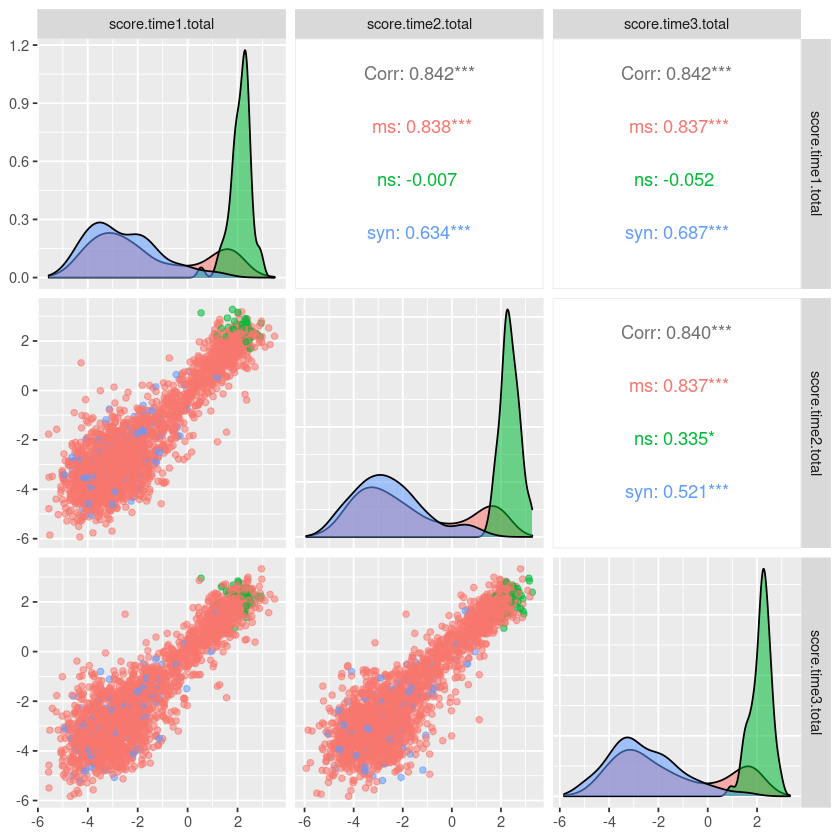

In [124]:
ggpairs(df2[df2$cat2!="latens",],
      columns = c("score.time1.total","score.time2.total","score.time3.total"),
       mapping = aes(color=cat2, alpha =0.5), upper = list(continuous = wrap("cor", method = "spearman")))


In [125]:
head(df1)

barcode,Seq11,Seq12,Seq13,orig,pos,new,mutType,totalCount,Seq11.adj,Seq12.adj,Seq13.adj,tot.adj,mut
<chr>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
TCTGTCGATTATTTCCTC,3878,526,70,Y,65,M,missense,4225,77.316971,24.426013,3.816457,7.383042,Y65M
GAGCTTGTTCACGTGTTG,97,32,129,R,98,S,missense,4367,1.933921,1.485993,7.033186,7.631182,R98S
ATGGGTCCAAGTTCACGT,429,NA,NA,L,113,Q,missense,11594,8.553115,NA,NA,20.260116,L113Q
AACCTTAAAGAGCGGCCT,62,NA,158,P,11,A,missense,3491,1.236115,NA,8.614290,6.100402,P11A
GATAGCTGTCGATGTCAG,4194,514,900,V,80,G,missense,8469,83.617168,23.868766,49.068738,14.799286,V80G
TGATCAGTCCTCGATCTC,89,NA,NA,G,52,T,missense,5803,1.774422,NA,NA,10.140543,G52T


In [126]:
head(df2)

,orig,pos,new,Seq11.adj,Seq12.adj,Seq13.adj,tot.adj,mutation,cat,cat2,score.time1.total,score.time2.total,score.time3.total
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,A,114,A,80.18795,73.788849,81.0179386,861.7749,A114A,syn,syn,-3.272949,-3.379125,-3.259733
2,A,114,C,25.16091,36.221084,28.8960346,304.5937,A114C,ms,ms,-3.161446,-2.766867,-3.015795
3,A,114,D,50.76045,87.673598,6.3244151,406.8205,A114D,ms,ms,-2.778222,-2.093386,-4.674323
4,A,114,E,93.08740,37.799952,5.8882486,363.8276,A114E,ms,ms,-1.858505,-2.967292,-4.556341
5,A,114,F,37.86099,5.200976,0.8723331,149.7386,A114F,ms,ms,-1.738791,-3.393477,-3.876979
6,A,114,G,148.41349,37.846389,96.9380181,1154.8039,A114G,ms,ms,-2.878320,-4.605533,-3.445240


In [127]:
length(unique(df2$mutation))

[1] 2592

In [128]:
head(df1)
unique(df1$mutType)

barcode,Seq11,Seq12,Seq13,orig,pos,new,mutType,totalCount,Seq11.adj,Seq12.adj,Seq13.adj,tot.adj,mut
<chr>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
TCTGTCGATTATTTCCTC,3878,526,70,Y,65,M,missense,4225,77.316971,24.426013,3.816457,7.383042,Y65M
GAGCTTGTTCACGTGTTG,97,32,129,R,98,S,missense,4367,1.933921,1.485993,7.033186,7.631182,R98S
ATGGGTCCAAGTTCACGT,429,NA,NA,L,113,Q,missense,11594,8.553115,NA,NA,20.260116,L113Q
AACCTTAAAGAGCGGCCT,62,NA,158,P,11,A,missense,3491,1.236115,NA,8.614290,6.100402,P11A
GATAGCTGTCGATGTCAG,4194,514,900,V,80,G,missense,8469,83.617168,23.868766,49.068738,14.799286,V80G
TGATCAGTCCTCGATCTC,89,NA,NA,G,52,T,missense,5803,1.774422,NA,NA,10.140543,G52T


[1] "missense" "synon"    "nonsense"

In [129]:
colnames(df1)
colnames(df2)
nrow(df1)
nrow(df2)

[1] "barcode"    "Seq11"      "Seq12"      "Seq13"      "orig"      
 [6] "pos"        "new"        "mutType"    "totalCount" "Seq11.adj" 
[11] "Seq12.adj"  "Seq13.adj"  "tot.adj"    "mut"

[1] "orig"              "pos"               "new"              
 [4] "Seq11.adj"         "Seq12.adj"         "Seq13.adj"        
 [7] "tot.adj"           "mutation"          "cat"              
[10] "cat2"              "score.time1.total" "score.time2.total"
[13] "score.time3.total"

[1] 80276

[1] 2592

### Quality Control

In [130]:
syn <- df2[df2$cat2=="syn",]
missense <- df2[df2$cat =="ms",]

cv <- sd(syn$score.time1.total, na.rm = T)/mean(syn$score.time1.total, na.rm = T)

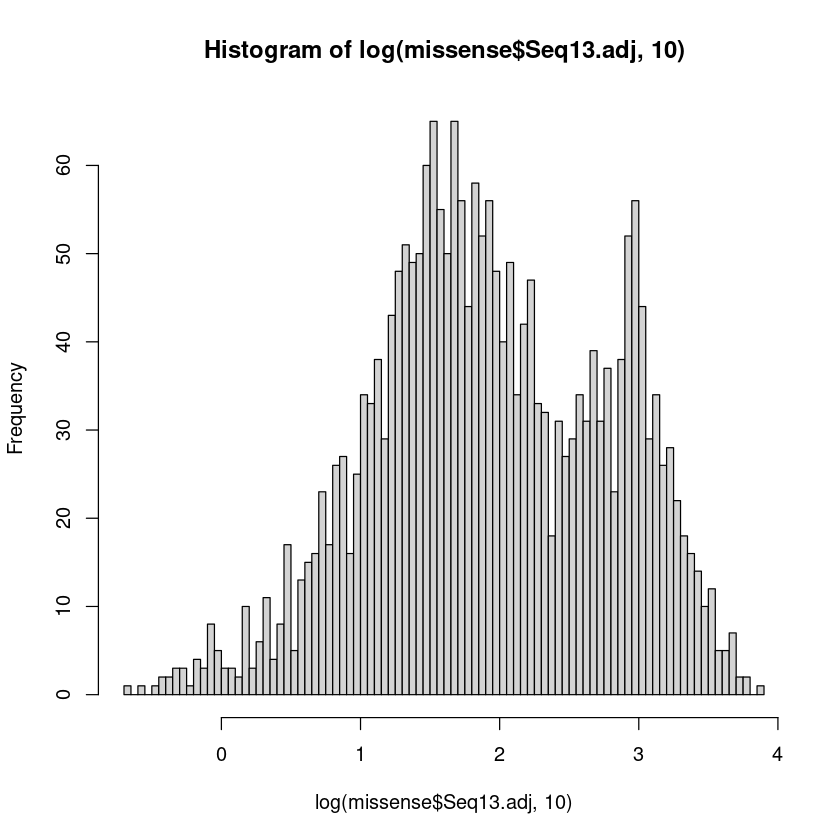

In [131]:
hist(log(missense$Seq13.adj,10), breaks=100)

In [132]:
summary(log(df2$tot.adj,10))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1027  2.3004  2.4876  2.4810  2.6985  3.3503 

In [133]:
cv

[1] -0.5462411

Warning message:
“Removed 5 rows containing non-finite values (stat_density).”
Warning message:
“Removed 3 rows containing non-finite values (stat_density).”


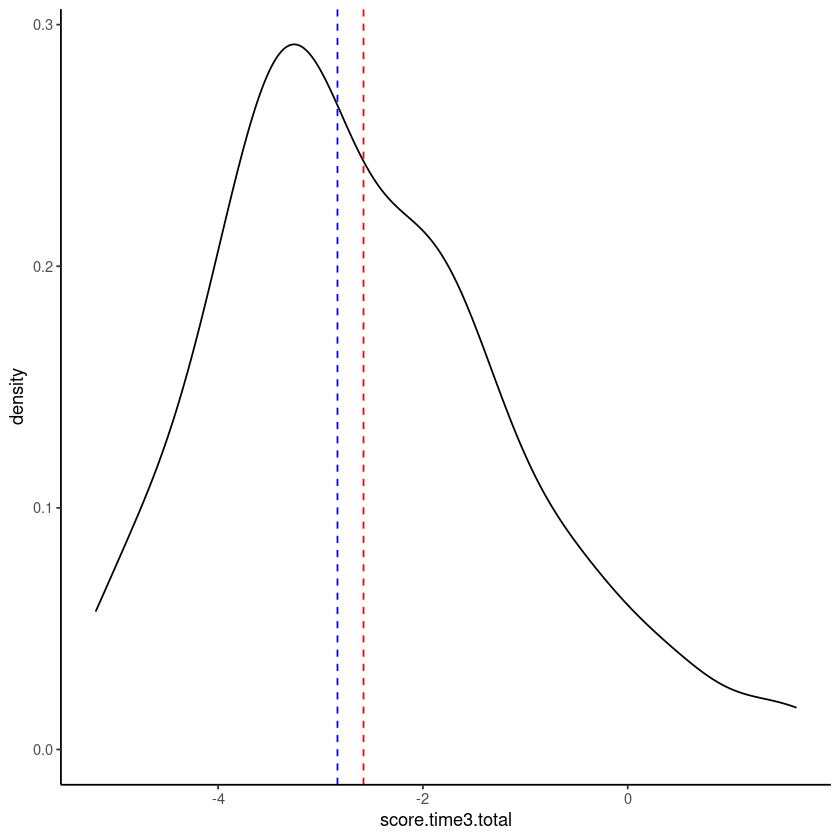

Warning message:
“Removed 1 rows containing non-finite values (stat_density).”


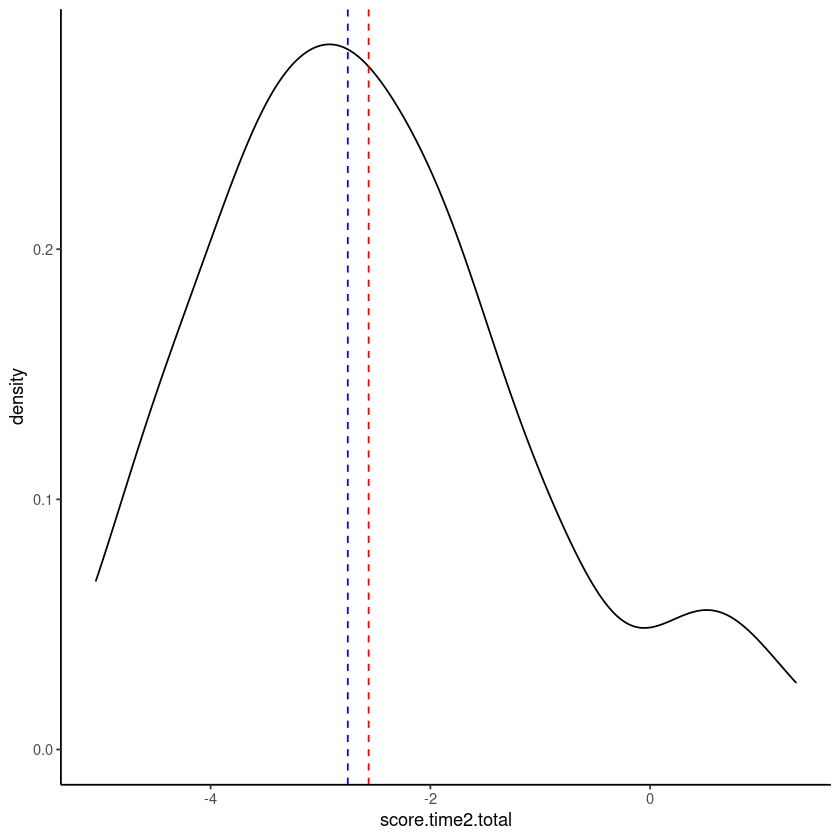

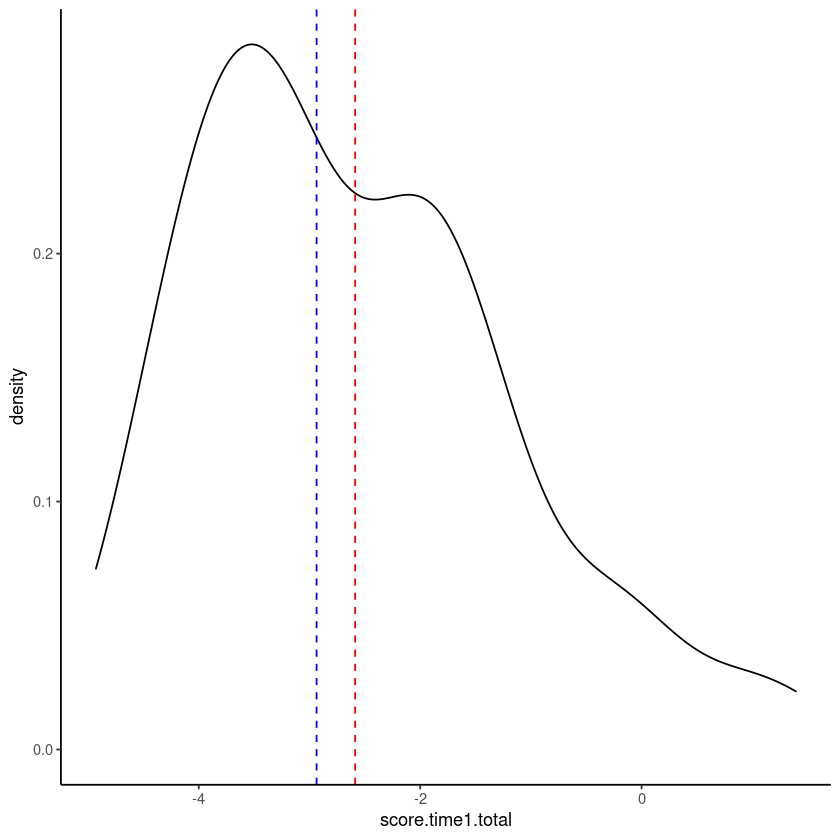

In [134]:
ggplot(syn,aes(score.time3.total))+geom_density()+geom_vline(xintercept = mean(syn$score.time3.total, na.rm = T), col="red",lty=2)+
    geom_vline(xintercept = median(syn$score.time3.total, na.rm = T), col="blue",lty=2)+
    theme_classic()


ggplot(syn,aes(score.time2.total))+geom_density()+geom_vline(xintercept = mean(syn$score.time2.total, na.rm = T), col="red",lty=2)+
    geom_vline(xintercept = median(syn$score.time2.total, na.rm = T), col="blue",lty=2)+
    theme_classic()

ggplot(syn,aes(score.time1.total))+geom_density()+geom_vline(xintercept = mean(syn$score.time1.total, na.rm = T), col="red",lty=2)+
    geom_vline(xintercept = median(syn$score.time1.total, na.rm = T), col="blue",lty=2)+
    theme_classic()

In [148]:
colnames(df2)

[1] "orig"              "pos"               "new"              
 [4] "Seq11.adj"         "Seq12.adj"         "Seq13.adj"        
 [7] "tot.adj"           "mutation"          "cat"              
[10] "cat2"              "score.time1.total" "score.time2.total"
[13] "score.time3.total"

## NEED TO REDO THE QC PROCESS BECAUSE RIGHT NOW IT IS ON THE BASIS OF THE SUB-A COUNT

I think the way to do the cutoff is basically take the minimum of the adjusted counts and go from there 

so the df2 colnames are
'orig''pos''new''Seq11.adj''Seq12.adj''Seq13.adj''tot.adj''mutation''cat''cat2''score.time1.total''score.time2.total''score.time3.total'

Approach 1: tried finding the minimum across three replicates and that did not work out (cant figure out how to remove NA and the following command with na.rm=T does not work
 df2$min = apply(df2[,c('Seq11.adj','Seq12.adj','Seq13.adj')],1,min, na.rm=T)
 
 Approach 2: since have to calculate the QC graph for each of the things individually, will use the Seq.1X.adj as cutoff. 

In [195]:
syn <- df2[df2$cat2=="syn",]
missense <- df2[df2$cat =="ms",]

df <- data.frame(cutoff = double(),synonymous3=double(),
                 cv3=double(), missense3 = double(), 
                 mean_syn3=double(), median_syn3=double(),
                synonymous2= double(), cv2=double(), missense2=double(), 
                 mean_syn2=double(), 
                 median_syn2=double(), 
                 synonymousA = double(), cvA=double(), missenseA=double(),
                 mean_synA=double(), median_synA=double()
                )
totCutoff = seq(0,3,by=0.5)
# tried till 2000 with a 50 jump each, but realized that the 


for (x in totCutoff){
    #need 3 replicates 
    a1 <- syn[log(syn$Seq11.adj,10) > x, ]
    a2 <- syn[log(syn$Seq12.adj,10) > x, ]
    a3 <- syn[log(syn$Seq13.adj,10) > x, ]
    
    m1 <- missense[log(missense$Seq11.adj,10) > x, ]
    m2 <- missense[log(missense$Seq12.adj,10) > x, ]
    m3 <- missense[log(missense$Seq13.adj,10) > x, ]
    
    ms1 = nrow(m1)
    ms2 = nrow(m2)
    ms3 = nrow(m3)
    
    cv1 = sd(a1$score.time1.total, na.rm=T)/mean(a1$score.time1.total, na.rm=T)
    cv2 = sd(a2$score.time2.total, na.rm=T)/mean(a2$score.time2.total, na.rm=T)
    cv3 = sd(a3$score.time3.total, na.rm=T)/mean(a3$score.time3.total, na.rm=T)
    
    # 'cutoff''synonymous3''cv3''missense3''mean_syn3''median_syn3''synonymous2''cv2'
    # 'missense2''mean_syn2''median_syn2''synonymousA''cvA''missenseA''mean_synA''median_synA'
    df[nrow(df)+1,] <- c(x, nrow(a1), 
                         cv1, ms1, 
                         mean(a1$score.time1.total, na.rm=T), median(a1$score.time1.total, na.rm=T),
                         nrow(a2),
                         cv2, ms2,
                         mean(a2$score.time2.total, na.rm=T), 
                         median(a2$score.time2.total, na.rm=T), 
                         nrow(a3),
                         cv3, ms3,
                         mean(a3$score.time3.total, na.rm=T), median(a3$score.time3.total, na.rm=T)
                        )
                
}

head(df)

,cutoff,synonymous3,cv3,missense3,mean_syn3,median_syn3,synonymous2,cv2,missense2,mean_syn2,median_syn2,synonymousA,cvA,missenseA,mean_synA,median_synA
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.0,100,-0.5462411,2322,-2.587415,-2.93564139,97,-0.5684018,2318,-2.5210148,-2.7241912,98,-0.5660518,2334,-2.54484873,-2.8227797
2,0.5,91,-0.5489998,2225,-2.489367,-2.72993540,93,-0.5788403,2218,-2.4806856,-2.6895853,96,-0.5734046,2267,-2.51546715,-2.7658692
3,1.0,84,-0.5729471,2030,-2.385563,-2.47856598,81,-0.6007263,2020,-2.2002704,-2.4947928,88,-0.5928743,2084,-2.36496570,-2.5372299
4,1.5,64,-0.6511635,1599,-2.000731,-2.04839890,70,-0.6378001,1606,-1.9854899,-2.1578922,67,-0.6717164,1649,-1.90886457,-2.0307274
5,2.0,34,-0.9907025,1073,-1.192863,-1.27959623,34,-1.1335041,1077,-1.0844012,-1.1840214,38,-0.9917367,1100,-1.11007128,-1.4175627
6,2.5,8,1.8720878,712,0.346191,0.07086243,13,6.2693202,716,0.1412514,0.3163396,14,-94.4386067,747,-0.01380444,0.3306514


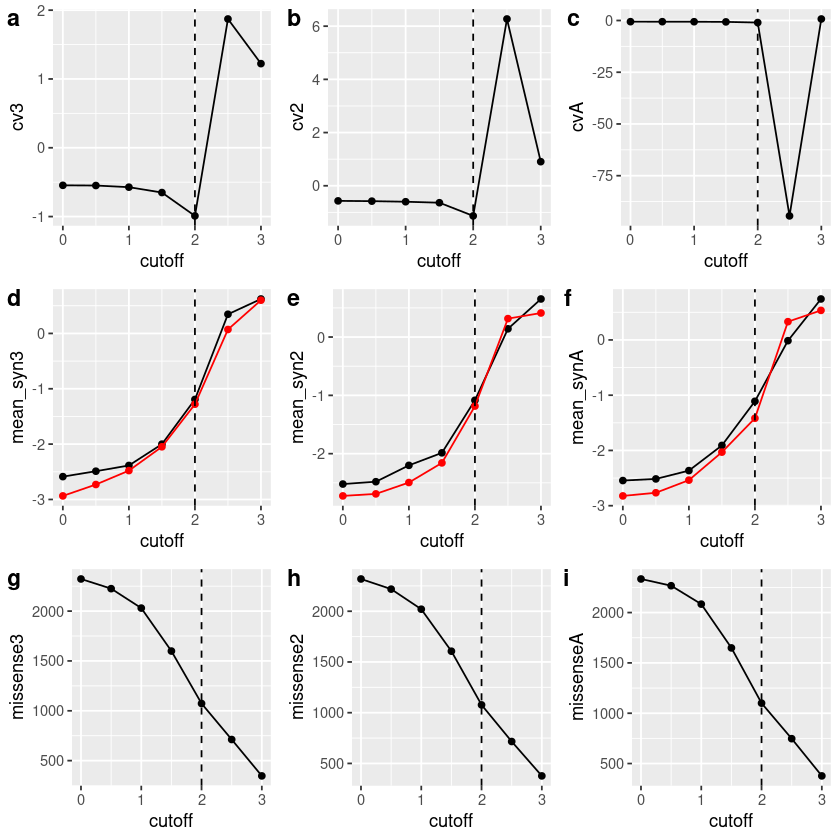

In [199]:
p1 = ggplot(df,aes(cutoff, cv3)) + geom_point() + geom_line()+geom_vline(xintercept = 2, lty=2)

p2 = ggplot(df,aes(cutoff, mean_syn3)) + geom_point() + geom_line() + geom_point(data=df, aes(cutoff,median_syn3),col="red")+geom_line(data=df, aes(cutoff,median_syn3),col="red") +geom_vline(xintercept = 2, lty=2)

p3 = ggplot(df,aes(cutoff, cv2))  + geom_point() + geom_line()+geom_vline(xintercept = 2, lty=2)

p4 = ggplot(df,aes(cutoff, mean_syn2)) + geom_point() + geom_line() + geom_point(data=df, aes(cutoff,median_syn2),col="red")+geom_line(data=df, aes(cutoff,median_syn2),col="red") +geom_vline(xintercept = 2, lty=2)

p5 = ggplot(df,aes(cutoff, cvA)) + geom_point() + geom_line()+geom_vline(xintercept = 2, lty=2)

p6 = ggplot(df,aes(cutoff, mean_synA)) + geom_point() + geom_line() +geom_point(data=df, aes(cutoff,median_synA),col="red")+geom_line(data=df, aes(cutoff,median_synA),col="red") +geom_vline(xintercept = 2, lty=2)

p7 = ggplot(df,aes(cutoff, missense3)) + geom_point() + geom_line()+geom_vline(xintercept = 2, lty=2)

p8 = ggplot(df,aes(cutoff, missense2)) + geom_point() + geom_line()+geom_vline(xintercept = 2, lty=2)

p9 = ggplot(df,aes(cutoff, missenseA)) + geom_point() + geom_line()+geom_vline(xintercept = 2, lty=2)



ggarrange(p1,p3,p5,
          p2,p4,p6,
          p7,p8,p9,
          labels = c(letters[1:9]), nrow=3, ncol=3)


I think based on the plot below, 10^0.5 (around 3PPM) for each replicate ends up being a reasonable cutoff (for prelim analyses at least) - i.e. balances between loss of missense 
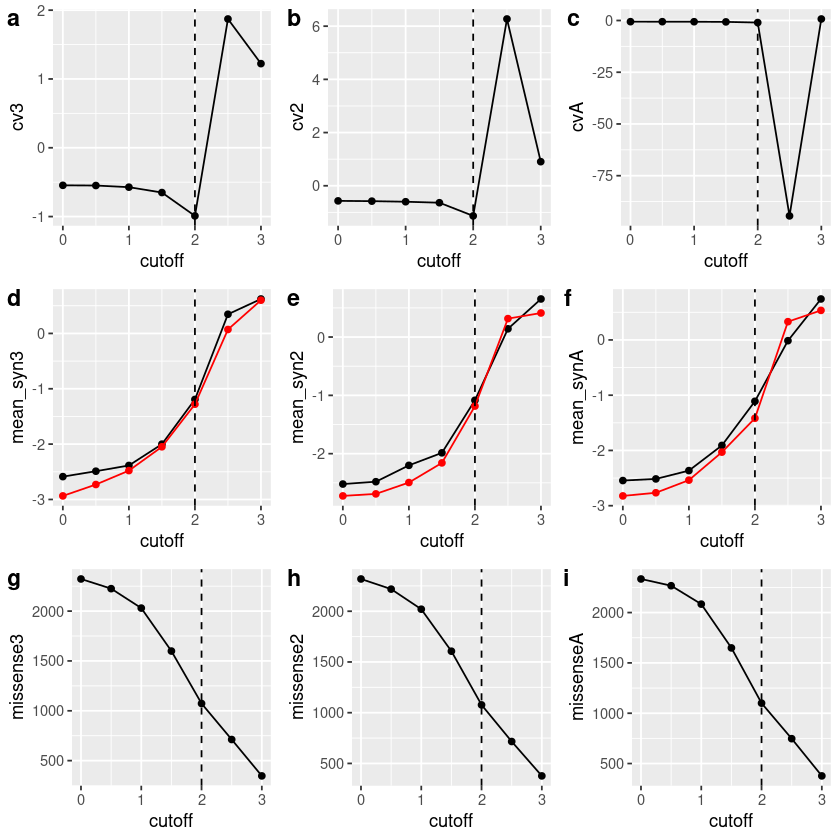

In [264]:
which(is.na(df2$orig))

integer(0)

In [271]:
scores <- df2[(df2$Seq11.adj>5 & df2$Seq12.adj>5 &
               !is.na(df2$Seq11.adj) & !is.na(df2$Seq12.adj)
               )
              | 
         (df2$Seq11.adj>5 & df2$Seq13.adj>5 &
               !is.na(df2$Seq11.adj) & !is.na(df2$Seq13.adj)
         ) 
              |
        (df2$Seq12.adj>5 & df2$Seq13.adj>5 &
               !is.na(df2$Seq13.adj) & !is.na(df2$Seq12.adj)
              ),]


In [272]:
nrow(df2)
nrow(scores)

[1] 2592

[1] 2341

In [274]:
length(unique(scores$mutation))

[1] 2341

Warning message:
“Removed 16 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 9 rows containing non-finite values (stat_ydensity).”


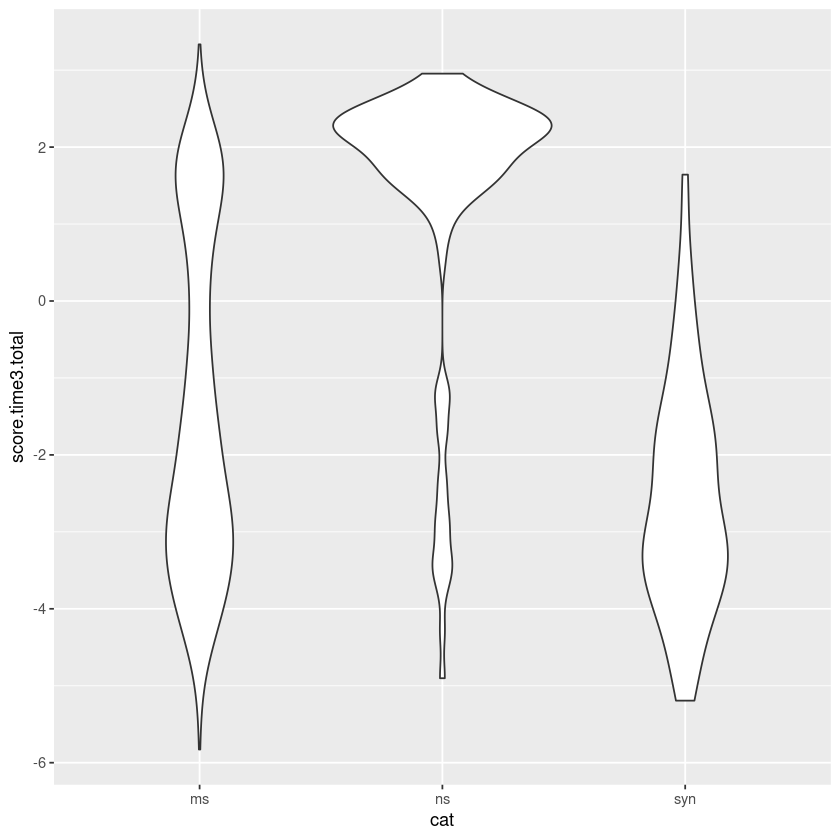

Warning message:
“Removed 14 rows containing non-finite values (stat_ydensity).”


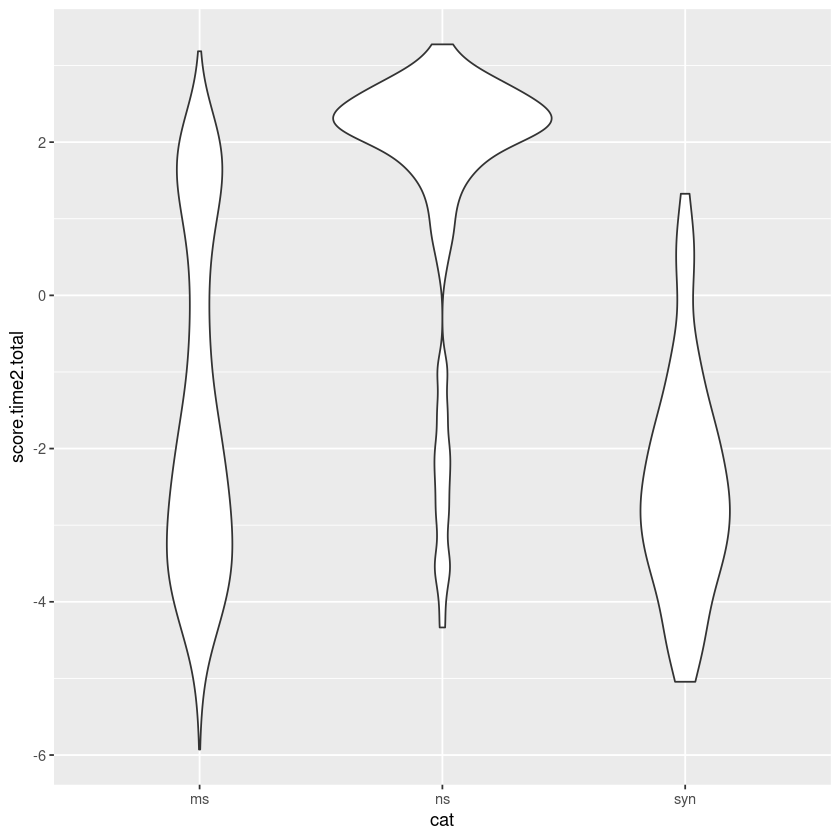

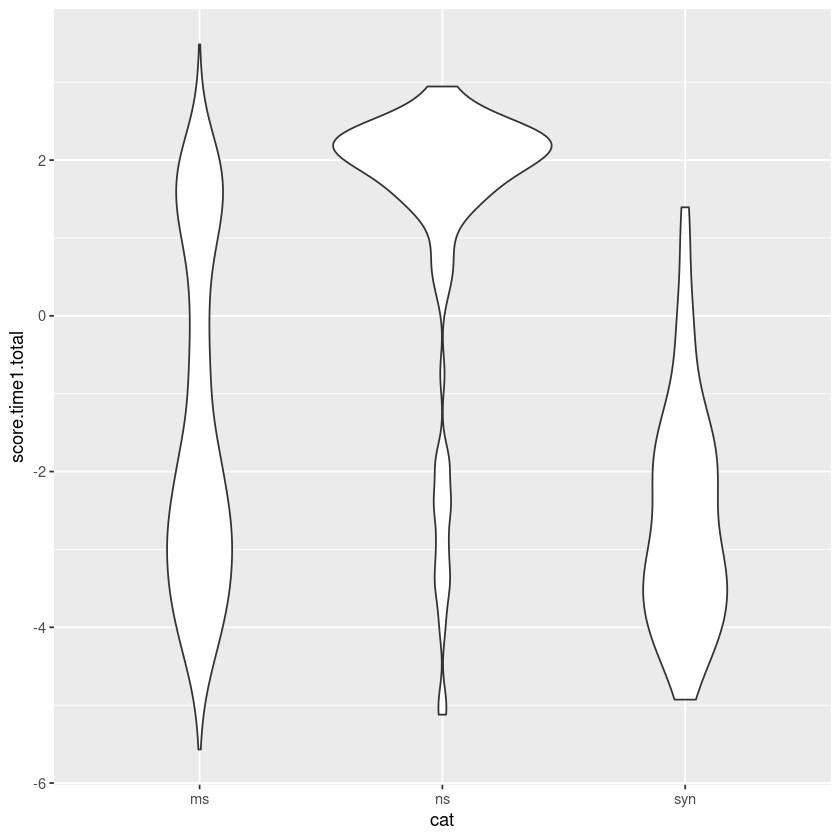

In [275]:
ggplot(scores,aes(cat,score.time3.total))+geom_violin()

ggplot(scores,aes(cat,score.time2.total))+geom_violin()

ggplot(scores,aes(cat,score.time1.total))+geom_violin()



In [276]:
### "normalization" of scores based on median of syn and median of early ns 

synMed1 = median(scores[scores$cat2=="syn",11], na.rm = T)
ensMed1 = median(scores[scores$cat2=="ns",11], na.rm = T)

synMed2 = median(scores[scores$cat2=="syn",12], na.rm = T)
ensMed2 = median(scores[scores$cat2=="ns",12], na.rm = T)

synMed3 = median(scores[scores$cat2=="syn",13], na.rm = T)
ensMed3 = median(scores[scores$cat2=="ns",13], na.rm = T)


scores$norm.ou1 = (scores$score.time1.total - ensMed1)/(synMed1 - ensMed1)
scores$norm.ou2 = (scores$score.time2.total - ensMed2)/(synMed2 - ensMed2)
scores$norm.ou3 = (scores$score.time3.total - ensMed3)/(synMed3 - ensMed3)

In [277]:
colnames(scores)

[1] "orig"              "pos"               "new"              
 [4] "Seq11.adj"         "Seq12.adj"         "Seq13.adj"        
 [7] "tot.adj"           "mutation"          "cat"              
[10] "cat2"              "score.time1.total" "score.time2.total"
[13] "score.time3.total" "min"               "norm.ou1"         
[16] "norm.ou2"          "norm.ou3"

In [278]:
head(scores)

,orig,pos,new,Seq11.adj,Seq12.adj,Seq13.adj,tot.adj,mutation,cat,cat2,score.time1.total,score.time2.total,score.time3.total,min,norm.ou1,norm.ou2,norm.ou3
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A,114,A,80.18795,73.788849,81.0179386,861.7749,A114A,syn,syn,-3.272949,-3.379125,-3.259733,73.7888494,1.0658800,1.135423,1.074279
2,A,114,C,25.16091,36.221084,28.8960346,304.5937,A114C,ms,ms,-3.161446,-2.766867,-3.015795,25.1609122,1.0441021,1.013460,1.026503
3,A,114,D,50.76045,87.673598,6.3244151,406.8205,A114D,ms,ms,-2.778222,-2.093386,-4.674323,6.3244151,0.9692542,0.879302,1.351333
4,A,114,E,93.08740,37.799952,5.8882486,363.8276,A114E,ms,ms,-1.858505,-2.967292,-4.556341,5.8882486,0.7896231,1.053385,1.328226
5,A,114,F,37.86099,5.200976,0.8723331,149.7386,A114F,ms,ms,-1.738791,-3.393477,-3.876979,0.8723331,0.7662415,1.138282,1.195170
6,A,114,G,148.41349,37.846389,96.9380181,1154.8039,A114G,ms,ms,-2.878320,-4.605533,-3.445240,37.8463891,0.9888045,1.379725,1.110612


In [279]:
colnames(scores)[8]

[1] "mutation"

In [280]:
length(unique(scores[scores$cat2=="syn",8]))

length(unique(scores[scores$cat2=="ns",8]))

length(unique(scores[scores$cat2=="latens",8]))

length(unique(scores[scores$cat2=="ms",8]))

[1] 91

[1] 55

[1] 64

[1] 2131

In [281]:
head(scores)

,orig,pos,new,Seq11.adj,Seq12.adj,Seq13.adj,tot.adj,mutation,cat,cat2,score.time1.total,score.time2.total,score.time3.total,min,norm.ou1,norm.ou2,norm.ou3
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A,114,A,80.18795,73.788849,81.0179386,861.7749,A114A,syn,syn,-3.272949,-3.379125,-3.259733,73.7888494,1.0658800,1.135423,1.074279
2,A,114,C,25.16091,36.221084,28.8960346,304.5937,A114C,ms,ms,-3.161446,-2.766867,-3.015795,25.1609122,1.0441021,1.013460,1.026503
3,A,114,D,50.76045,87.673598,6.3244151,406.8205,A114D,ms,ms,-2.778222,-2.093386,-4.674323,6.3244151,0.9692542,0.879302,1.351333
4,A,114,E,93.08740,37.799952,5.8882486,363.8276,A114E,ms,ms,-1.858505,-2.967292,-4.556341,5.8882486,0.7896231,1.053385,1.328226
5,A,114,F,37.86099,5.200976,0.8723331,149.7386,A114F,ms,ms,-1.738791,-3.393477,-3.876979,0.8723331,0.7662415,1.138282,1.195170
6,A,114,G,148.41349,37.846389,96.9380181,1154.8039,A114G,ms,ms,-2.878320,-4.605533,-3.445240,37.8463891,0.9888045,1.379725,1.110612


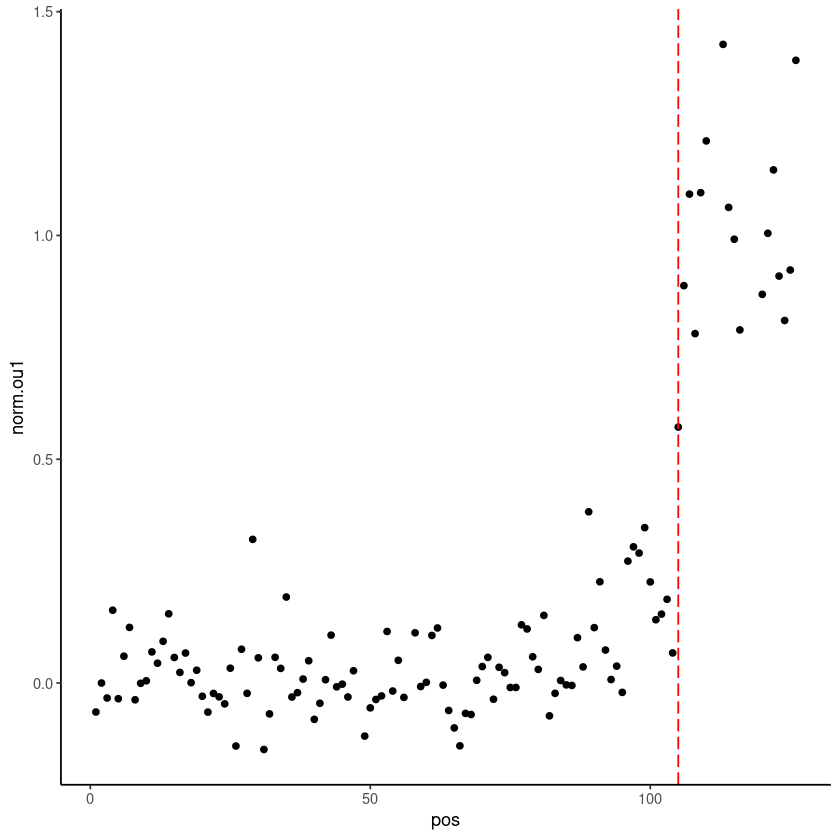

In [282]:
ggplot(scores[scores$cat =="ns",],aes(pos,norm.ou1))+
    geom_point(fill="green")+theme_classic()+geom_vline(xintercept=105, lty=5, color="red")


In [283]:
scores$cat3 = ifelse(scores$cat =="ns" & scores$pos >104, "tailns",scores$cat2)

In [284]:
head(scores)

,orig,pos,new,Seq11.adj,Seq12.adj,Seq13.adj,tot.adj,mutation,cat,cat2,score.time1.total,score.time2.total,score.time3.total,min,norm.ou1,norm.ou2,norm.ou3,cat3
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,A,114,A,80.18795,73.788849,81.0179386,861.7749,A114A,syn,syn,-3.272949,-3.379125,-3.259733,73.7888494,1.0658800,1.135423,1.074279,syn
2,A,114,C,25.16091,36.221084,28.8960346,304.5937,A114C,ms,ms,-3.161446,-2.766867,-3.015795,25.1609122,1.0441021,1.013460,1.026503,ms
3,A,114,D,50.76045,87.673598,6.3244151,406.8205,A114D,ms,ms,-2.778222,-2.093386,-4.674323,6.3244151,0.9692542,0.879302,1.351333,ms
4,A,114,E,93.08740,37.799952,5.8882486,363.8276,A114E,ms,ms,-1.858505,-2.967292,-4.556341,5.8882486,0.7896231,1.053385,1.328226,ms
5,A,114,F,37.86099,5.200976,0.8723331,149.7386,A114F,ms,ms,-1.738791,-3.393477,-3.876979,0.8723331,0.7662415,1.138282,1.195170,ms
6,A,114,G,148.41349,37.846389,96.9380181,1154.8039,A114G,ms,ms,-2.878320,-4.605533,-3.445240,37.8463891,0.9888045,1.379725,1.110612,ms


In [285]:
scores1 <- scores
scores1$cat3 <- factor(scores$cat3,     # Reorder factor levels
                         c("syn", "ns", "latens", "tailns","ms"))


In [286]:
head(scores1)

,orig,pos,new,Seq11.adj,Seq12.adj,Seq13.adj,tot.adj,mutation,cat,cat2,score.time1.total,score.time2.total,score.time3.total,min,norm.ou1,norm.ou2,norm.ou3,cat3
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,A,114,A,80.18795,73.788849,81.0179386,861.7749,A114A,syn,syn,-3.272949,-3.379125,-3.259733,73.7888494,1.0658800,1.135423,1.074279,syn
2,A,114,C,25.16091,36.221084,28.8960346,304.5937,A114C,ms,ms,-3.161446,-2.766867,-3.015795,25.1609122,1.0441021,1.013460,1.026503,ms
3,A,114,D,50.76045,87.673598,6.3244151,406.8205,A114D,ms,ms,-2.778222,-2.093386,-4.674323,6.3244151,0.9692542,0.879302,1.351333,ms
4,A,114,E,93.08740,37.799952,5.8882486,363.8276,A114E,ms,ms,-1.858505,-2.967292,-4.556341,5.8882486,0.7896231,1.053385,1.328226,ms
5,A,114,F,37.86099,5.200976,0.8723331,149.7386,A114F,ms,ms,-1.738791,-3.393477,-3.876979,0.8723331,0.7662415,1.138282,1.195170,ms
6,A,114,G,148.41349,37.846389,96.9380181,1154.8039,A114G,ms,ms,-2.878320,-4.605533,-3.445240,37.8463891,0.9888045,1.379725,1.110612,ms


In [287]:
tapply(scores$norm.ou1, scores$cat3 =="syn", mean, na.rm=T)[2] - 
              1.96* tapply(scores$norm.ou1, scores$cat3 =="syn", sd, na.rm=T)[2]

TRUE 
0.3858043

Warning message:
“Removed 14 rows containing non-finite values (stat_bindot).”
Warning message:
“Removed 14 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 14 rows containing non-finite values (stat_boxplot).”


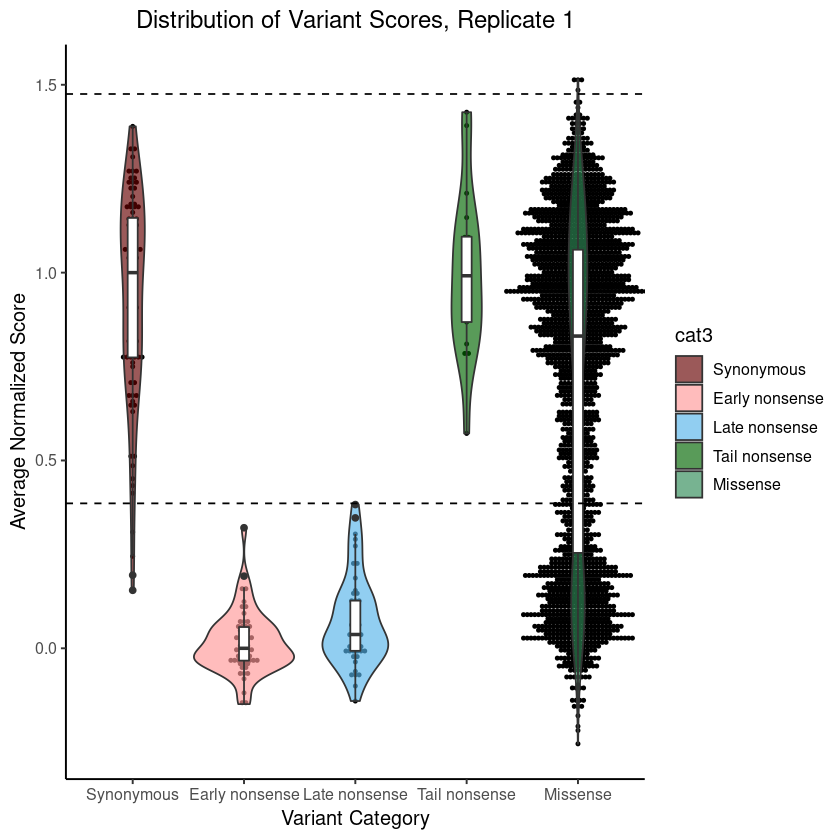

In [288]:
p <- ggplot(scores1,aes(cat3,norm.ou1))


p + geom_dotplot(binaxis = "y", stackdir = "center",binwidth = 0.01) + 
    geom_violin(aes(fill=cat3),alpha=0.65)+theme_classic2()+
     geom_boxplot(width=0.09) + scale_fill_manual(labels=c("Synonymous","Early nonsense", "Late nonsense", "Tail nonsense", "Missense"),
                                                  values=c("#660000", "#FF9999", "#56B4E9","#006600","seagreen"))+
    geom_hline(yintercept = tapply(scores$norm.ou1, scores$cat3 =="syn", mean, na.rm=T)[2] + 
              1.96* tapply(scores$norm.ou1, scores$cat3 =="syn", sd, na.rm=T)[2], lty=2, lwd=0.5) +
    geom_hline(yintercept = tapply(scores$norm.ou1, scores$cat3 =="syn", mean, na.rm=T)[2] - 
              1.96* tapply(scores$norm.ou1, scores$cat3 =="syn", sd, na.rm=T)[2], lty=2,lwd=0.5) + 
    labs(x="Variant Category", y="Average Normalized Score", title="Distribution of Variant Scores, Replicate 1") + 
    theme(plot.title = element_text(hjust = 0.5)) + scale_x_discrete(labels=c("Synonymous","Early nonsense", "Late nonsense", "Tail nonsense", "Missense"))


Warning message:
“Removed 9 rows containing non-finite values (stat_bindot).”
Warning message:
“Removed 9 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”


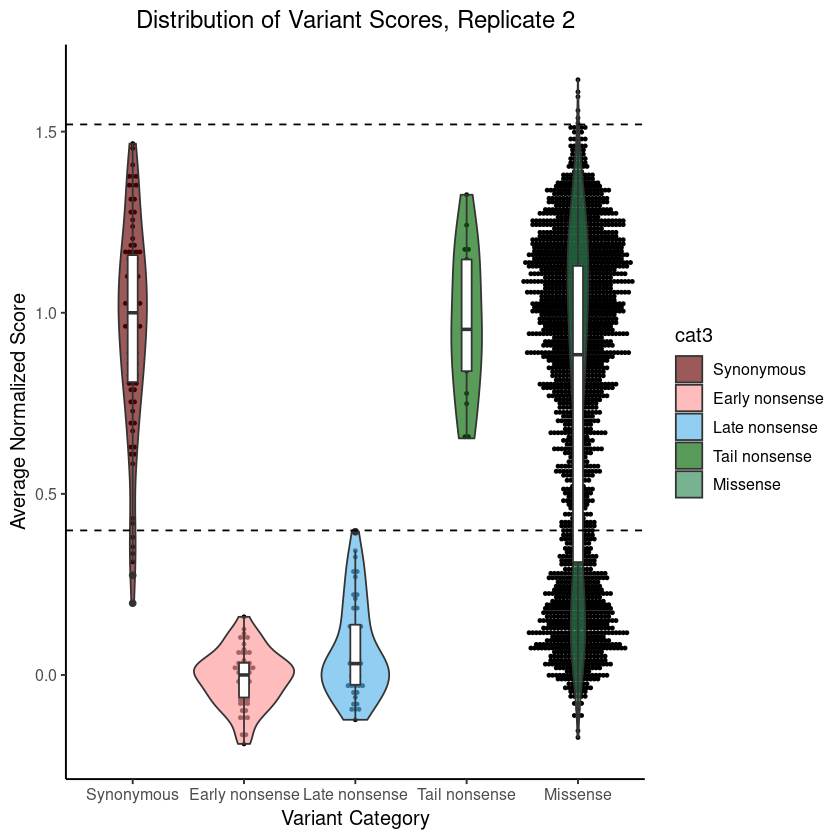

In [289]:
p <- ggplot(scores1,aes(cat3,norm.ou2))


p + geom_dotplot(binaxis = "y", stackdir = "center",binwidth = 0.01) + 
    geom_violin(aes(fill=cat3),alpha=0.65)+theme_classic2()+
     geom_boxplot(width=0.09) + scale_fill_manual(labels=c("Synonymous","Early nonsense", "Late nonsense", "Tail nonsense", "Missense"),
                                                  values=c("#660000", "#FF9999", "#56B4E9","#006600","seagreen"))+
    geom_hline(yintercept = tapply(scores$norm.ou2, scores$cat3 =="syn", mean, na.rm=T)[2] + 
              1.96* tapply(scores$norm.ou2, scores$cat3 =="syn", sd, na.rm=T)[2], lty=2, lwd=0.5) +
    geom_hline(yintercept = tapply(scores$norm.ou2, scores$cat3 =="syn", mean, na.rm=T)[2] - 
              1.96* tapply(scores$norm.ou2, scores$cat3 =="syn", sd, na.rm=T)[2], lty=2,lwd=0.5) + 
    labs(x="Variant Category", y="Average Normalized Score", title="Distribution of Variant Scores, Replicate 2") + 
    theme(plot.title = element_text(hjust = 0.5)) + scale_x_discrete(labels=c("Synonymous","Early nonsense", "Late nonsense", "Tail nonsense", "Missense"))


Warning message:
“Removed 16 rows containing non-finite values (stat_bindot).”
Warning message:
“Removed 16 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 16 rows containing non-finite values (stat_boxplot).”


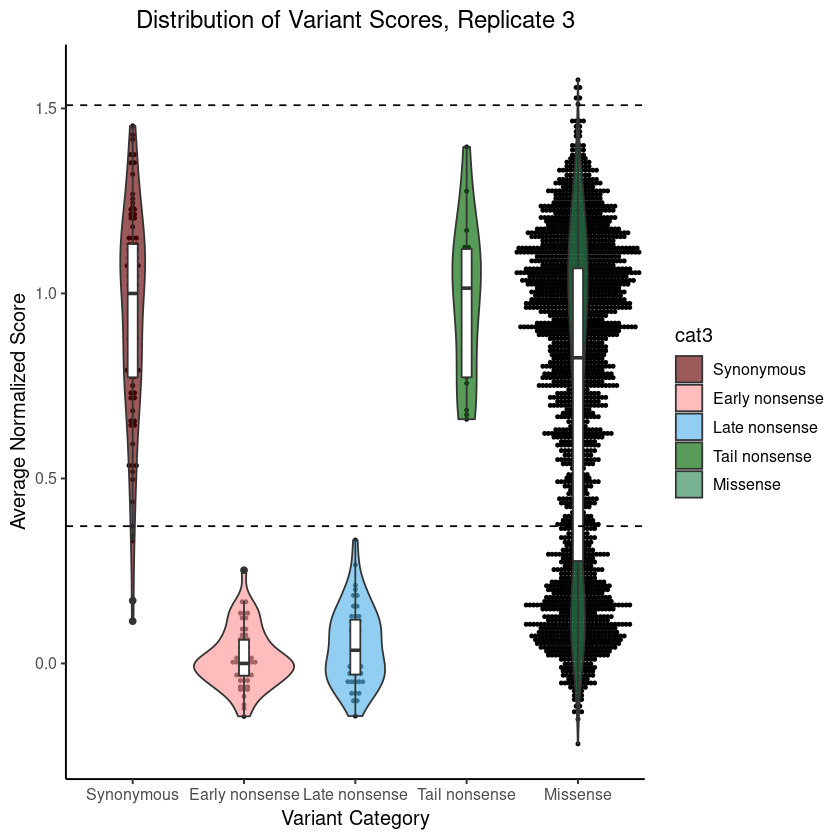

In [290]:
p <- ggplot(scores1,aes(cat3,norm.ou3))


p + geom_dotplot(binaxis = "y", stackdir = "center",binwidth = 0.01) + 
    geom_violin(aes(fill=cat3),alpha=0.65)+theme_classic2()+
     geom_boxplot(width=0.09) + scale_fill_manual(labels=c("Synonymous","Early nonsense", "Late nonsense", "Tail nonsense", "Missense"),
                                                  values=c("#660000", "#FF9999", "#56B4E9","#006600","seagreen"))+
    geom_hline(yintercept = tapply(scores$norm.ou3, scores$cat3 =="syn", mean, na.rm=T)[2] + 
              1.96* tapply(scores$norm.ou3, scores$cat3 =="syn", sd, na.rm=T)[2], lty=2, lwd=0.5) +
    geom_hline(yintercept = tapply(scores$norm.ou3, scores$cat3 =="syn", mean, na.rm=T)[2] - 
              1.96* tapply(scores$norm.ou3, scores$cat3 =="syn", sd, na.rm=T)[2], lty=2,lwd=0.5) + 
    labs(x="Variant Category", y="Average Normalized Score", title="Distribution of Variant Scores, Replicate 3") + 
    theme(plot.title = element_text(hjust = 0.5)) + scale_x_discrete(labels=c("Synonymous","Early nonsense", "Late nonsense", "Tail nonsense", "Missense"))


In [291]:
head(scores1)

,orig,pos,new,Seq11.adj,Seq12.adj,Seq13.adj,tot.adj,mutation,cat,cat2,score.time1.total,score.time2.total,score.time3.total,min,norm.ou1,norm.ou2,norm.ou3,cat3
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,A,114,A,80.18795,73.788849,81.0179386,861.7749,A114A,syn,syn,-3.272949,-3.379125,-3.259733,73.7888494,1.0658800,1.135423,1.074279,syn
2,A,114,C,25.16091,36.221084,28.8960346,304.5937,A114C,ms,ms,-3.161446,-2.766867,-3.015795,25.1609122,1.0441021,1.013460,1.026503,ms
3,A,114,D,50.76045,87.673598,6.3244151,406.8205,A114D,ms,ms,-2.778222,-2.093386,-4.674323,6.3244151,0.9692542,0.879302,1.351333,ms
4,A,114,E,93.08740,37.799952,5.8882486,363.8276,A114E,ms,ms,-1.858505,-2.967292,-4.556341,5.8882486,0.7896231,1.053385,1.328226,ms
5,A,114,F,37.86099,5.200976,0.8723331,149.7386,A114F,ms,ms,-1.738791,-3.393477,-3.876979,0.8723331,0.7662415,1.138282,1.195170,ms
6,A,114,G,148.41349,37.846389,96.9380181,1154.8039,A114G,ms,ms,-2.878320,-4.605533,-3.445240,37.8463891,0.9888045,1.379725,1.110612,ms


In [292]:
colnames(scores1)

[1] "orig"              "pos"               "new"              
 [4] "Seq11.adj"         "Seq12.adj"         "Seq13.adj"        
 [7] "tot.adj"           "mutation"          "cat"              
[10] "cat2"              "score.time1.total" "score.time2.total"
[13] "score.time3.total" "min"               "norm.ou1"         
[16] "norm.ou2"          "norm.ou3"          "cat3"

In [293]:
scores1$trans_av = rowMeans(scores1[,c(15:17)], na.rm=T)

scores1$sd_av = apply(scores1[,c(15:17)],1,sd, na.rm=T)

In [294]:
head(scores1)

,orig,pos,new,Seq11.adj,Seq12.adj,Seq13.adj,tot.adj,mutation,cat,cat2,score.time1.total,score.time2.total,score.time3.total,min,norm.ou1,norm.ou2,norm.ou3,cat3,trans_av,sd_av
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
1,A,114,A,80.18795,73.788849,81.0179386,861.7749,A114A,syn,syn,-3.272949,-3.379125,-3.259733,73.7888494,1.0658800,1.135423,1.074279,syn,1.091861,0.03795909
2,A,114,C,25.16091,36.221084,28.8960346,304.5937,A114C,ms,ms,-3.161446,-2.766867,-3.015795,25.1609122,1.0441021,1.013460,1.026503,ms,1.028022,0.01537724
3,A,114,D,50.76045,87.673598,6.3244151,406.8205,A114D,ms,ms,-2.778222,-2.093386,-4.674323,6.3244151,0.9692542,0.879302,1.351333,ms,1.066630,0.25062903
4,A,114,E,93.08740,37.799952,5.8882486,363.8276,A114E,ms,ms,-1.858505,-2.967292,-4.556341,5.8882486,0.7896231,1.053385,1.328226,ms,1.057078,0.26932047
5,A,114,F,37.86099,5.200976,0.8723331,149.7386,A114F,ms,ms,-1.738791,-3.393477,-3.876979,0.8723331,0.7662415,1.138282,1.195170,ms,1.033231,0.23296275
6,A,114,G,148.41349,37.846389,96.9380181,1154.8039,A114G,ms,ms,-2.878320,-4.605533,-3.445240,37.8463891,0.9888045,1.379725,1.110612,ms,1.159714,0.20003248


In [295]:
unique(scores1$cat)

[1] "syn" "ms"  "ns"

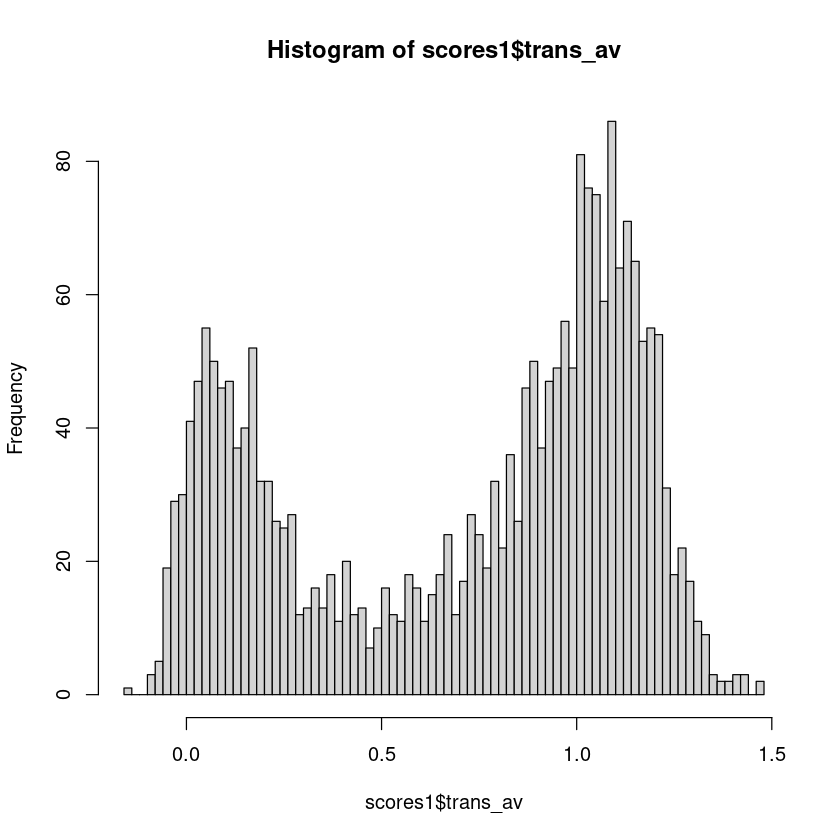

In [296]:
hist(scores1$trans_av, breaks=100)

png 
  2

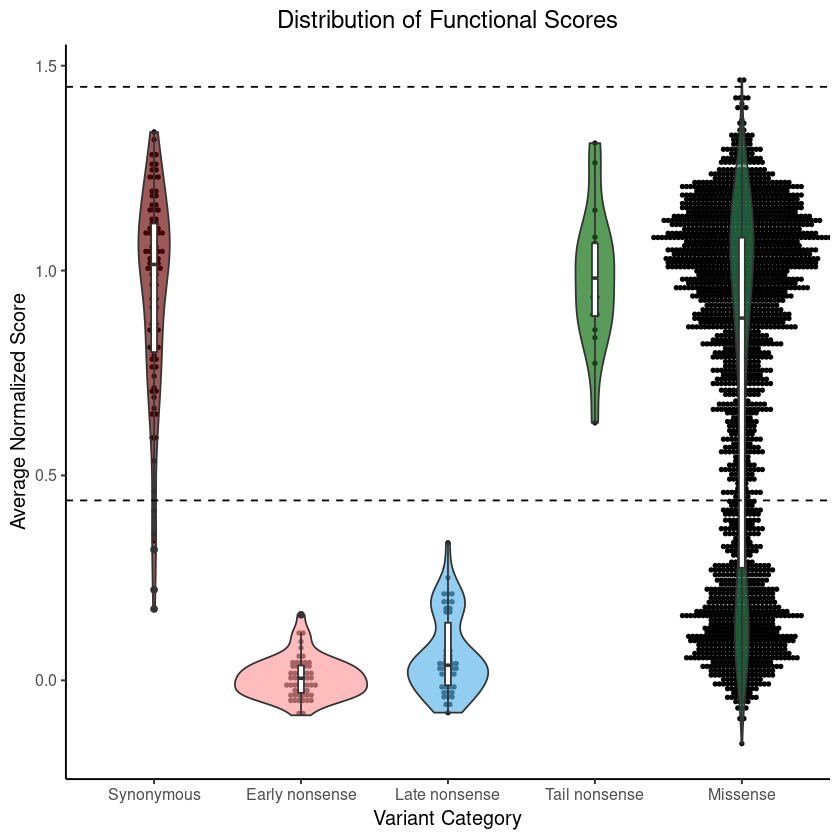

In [297]:
p <- ggplot(scores1,aes(cat3,trans_av))


p + geom_dotplot(binaxis = "y", stackdir = "center",binwidth = 0.01) + 
    geom_violin(aes(fill=cat3),alpha=0.65)+theme_classic2()+
     geom_boxplot(width=0.04) + scale_fill_manual(labels=c("Synonymous","Early nonsense", "Late nonsense", "Tail nonsense", "Missense"),
                                                  values=c("#660000", "#FF9999", "#56B4E9","#006600","seagreen"))+
    geom_hline(yintercept = tapply(scores1$trans_av, scores1$cat3 =="syn", mean, na.rm=T)[2] + 
              1.96* tapply(scores1$trans_av, scores1$cat3 =="syn", sd, na.rm=T)[2], lty=2, lwd=0.5) +
    geom_hline(yintercept = tapply(scores1$trans_av, scores1$cat3 =="syn", mean, na.rm=T)[2] - 
              1.96* tapply(scores1$trans_av, scores1$cat3 =="syn", sd, na.rm=T)[2], lty=2,lwd=0.5) + 
    labs(x="Variant Category", y="Average Normalized Score", title="Distribution of Functional Scores") + 
    theme(plot.title = element_text(hjust = 0.5), legend.position = "none") + scale_x_discrete(labels=c("Synonymous","Early nonsense", "Late nonsense", "Tail nonsense", "Missense"))

pdfName = paste("funcscores-allreps-norm-",Sys.Date(),".pdf",sep="")
pdf(pdfName, useDingbats = F)
p + geom_dotplot(binaxis = "y", stackdir = "center",binwidth = 0.01) + 
    geom_violin(aes(fill=cat3),alpha=0.65)+theme_classic2()+
     geom_boxplot(width=0.04) + scale_fill_manual(labels=c("Synonymous","Early nonsense", "Late nonsense", "Tail nonsense", "Missense"),
                                                  values=c("#660000", "#FF9999", "#56B4E9","#006600","seagreen"))+
    geom_hline(yintercept = tapply(scores1$trans_av, scores1$cat3 =="syn", mean, na.rm=T)[2] + 
              1.96* tapply(scores1$trans_av, scores1$cat3 =="syn", sd, na.rm=T)[2], lty=2, lwd=0.5) +
    geom_hline(yintercept = tapply(scores1$trans_av, scores1$cat3 =="syn", mean, na.rm=T)[2] - 
              1.96* tapply(scores1$trans_av, scores1$cat3 =="syn", sd, na.rm=T)[2], lty=2,lwd=0.5) + 
    labs(x="Variant Category", y="Average Normalized Score", title="Distribution of Functional Scores") + 
    theme(plot.title = element_text(hjust = 0.5), legend.position = "none") + scale_x_discrete(labels=c("Synonymous","Early nonsense", "Late nonsense", "Tail nonsense", "Missense"))

dev.off()

rm(pdfName)

png 
  2

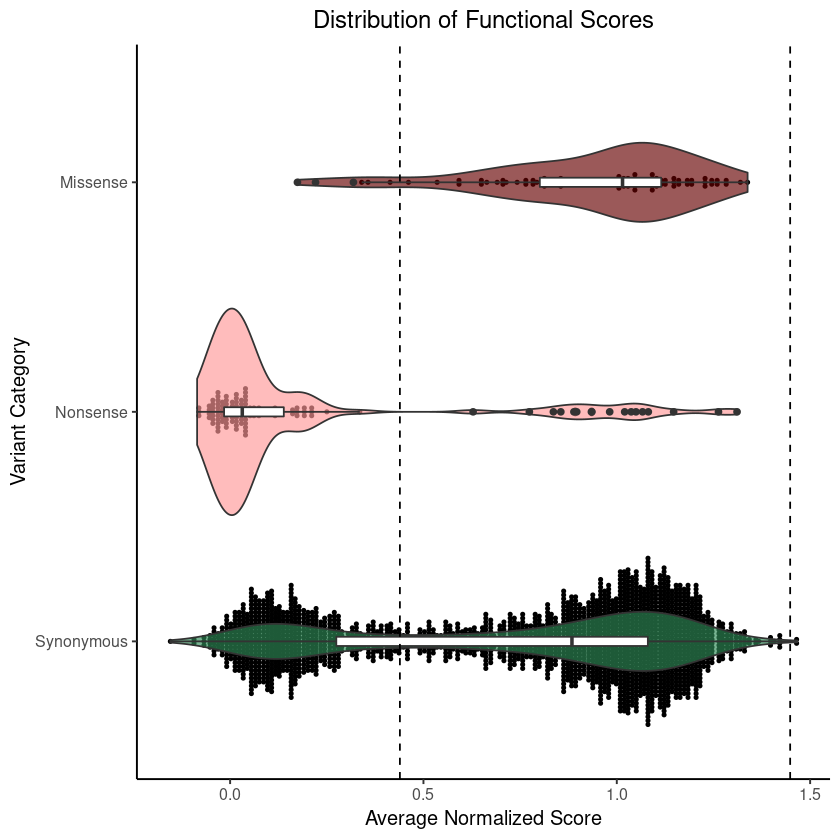

In [298]:
p <- ggplot(scores1,aes(cat,trans_av))

p + geom_dotplot(binaxis = "y", stackdir = "center",binwidth = 0.01) + 
    geom_violin(aes(fill=cat),alpha=0.65)+coord_flip()+theme_classic2()+
     geom_boxplot(width=0.04) + scale_fill_manual(labels=c("Missense","Nonsense", "Synonymous"),
                                                  values=c("seagreen", "#FF9999","#660000"))+
    geom_hline(yintercept = tapply(scores1$trans_av, scores1$cat =="syn", mean, na.rm=T)[2] + 
              1.96* tapply(scores1$trans_av, scores1$cat =="syn", sd, na.rm=T)[2], lty=2, lwd=0.5) +
    geom_hline(yintercept = tapply(scores1$trans_av, scores1$cat =="syn", mean, na.rm=T)[2] - 
              1.96* tapply(scores1$trans_av, scores1$cat =="syn", sd, na.rm=T)[2], lty=2,lwd=0.5) + 
    labs(x="Variant Category", y="Average Normalized Score", title="Distribution of Functional Scores") + 
    theme(plot.title = element_text(hjust = 0.5), legend.position = "none") + scale_x_discrete(labels=c("Synonymous","Nonsense", "Missense"))

pdfName = paste("funcscores-allreps-norm-nonsenseonly",Sys.Date(),".pdf",sep="")
pdf(pdfName, useDingbats = F)
p + geom_dotplot(binaxis = "y", stackdir = "center",binwidth = 0.01) + 
    geom_violin(aes(fill=cat),alpha=0.65)+coord_flip()+theme_classic2()+
     geom_boxplot(width=0.04) + scale_fill_manual(labels=c("Missense","Nonsense", "Synonymous"),
                                                  values=c("seagreen", "#FF9999","#660000"))+
    geom_hline(yintercept = tapply(scores1$trans_av, scores1$cat =="syn", mean, na.rm=T)[2] + 
              1.96* tapply(scores1$trans_av, scores1$cat =="syn", sd, na.rm=T)[2], lty=2, lwd=0.5) +
    geom_hline(yintercept = tapply(scores1$trans_av, scores1$cat =="syn", mean, na.rm=T)[2] - 
              1.96* tapply(scores1$trans_av, scores1$cat =="syn", sd, na.rm=T)[2], lty=2,lwd=0.5) + 
    labs(x="Variant Category", y="Average Normalized Score", title="Distribution of Functional Scores") + 
    theme(plot.title = element_text(hjust = 0.5), legend.position = "none") + scale_x_discrete(labels=c("Synonymous","Nonsense", "Missense"))
dev.off()
rm(pdfName)


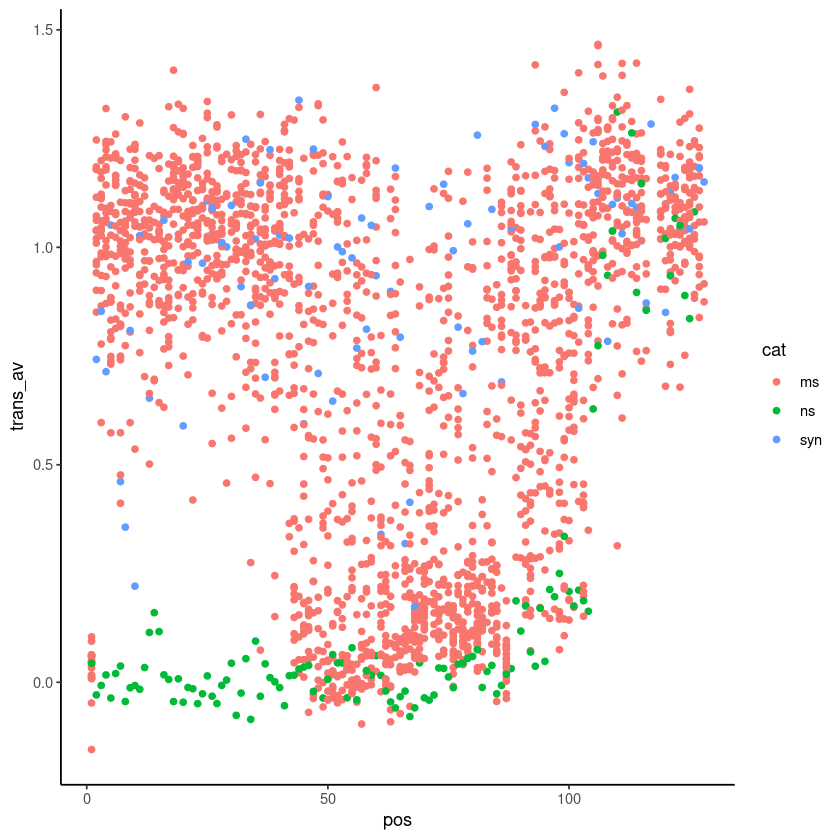

In [299]:
ggplot(scores1,aes(pos,trans_av,col=cat))+geom_point()+theme_classic()

In [300]:
colnames(scores1)

[1] "orig"              "pos"               "new"              
 [4] "Seq11.adj"         "Seq12.adj"         "Seq13.adj"        
 [7] "tot.adj"           "mutation"          "cat"              
[10] "cat2"              "score.time1.total" "score.time2.total"
[13] "score.time3.total" "min"               "norm.ou1"         
[16] "norm.ou2"          "norm.ou3"          "cat3"             
[19] "trans_av"          "sd_av"

In [301]:
scores1[is.na(scores1$trans_av),]

orig,pos,new,Seq11.adj,Seq12.adj,Seq13.adj,tot.adj,mutation,cat,cat2,score.time1.total,score.time2.total,score.time3.total,min,norm.ou1,norm.ou2,norm.ou3,cat3,trans_av,sd_av
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>


In [302]:
which(scores1$mutation=="L51H")

[1] 1101

The variants K41W and N111Q don't show up in any of the replicates -- will need to confirm that they are true duds versus trasnfection problem

Warning message in mean.default(scores1[scores1$cat == "syn", 18], na.rm = T):
“argument is not numeric or logical: returning NA”
Warning message:
“Removed 1 rows containing missing values (geom_hline).”
Warning message in mean.default(scores1[scores1$cat == "syn", 18], na.rm = T):
“argument is not numeric or logical: returning NA”
Warning message:
“Removed 1 rows containing missing values (geom_hline).”


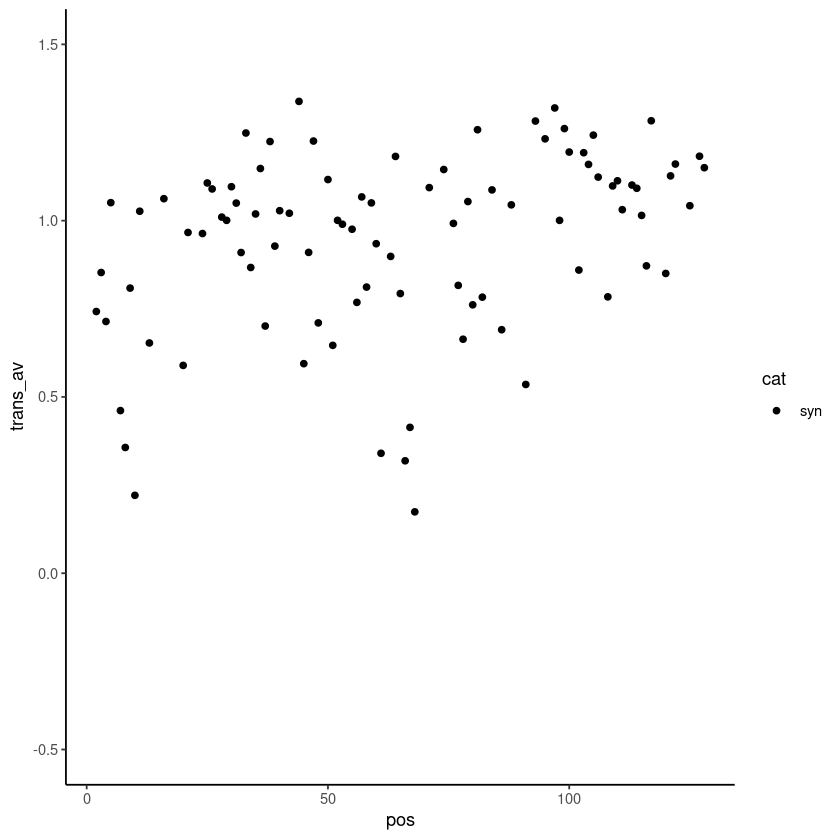

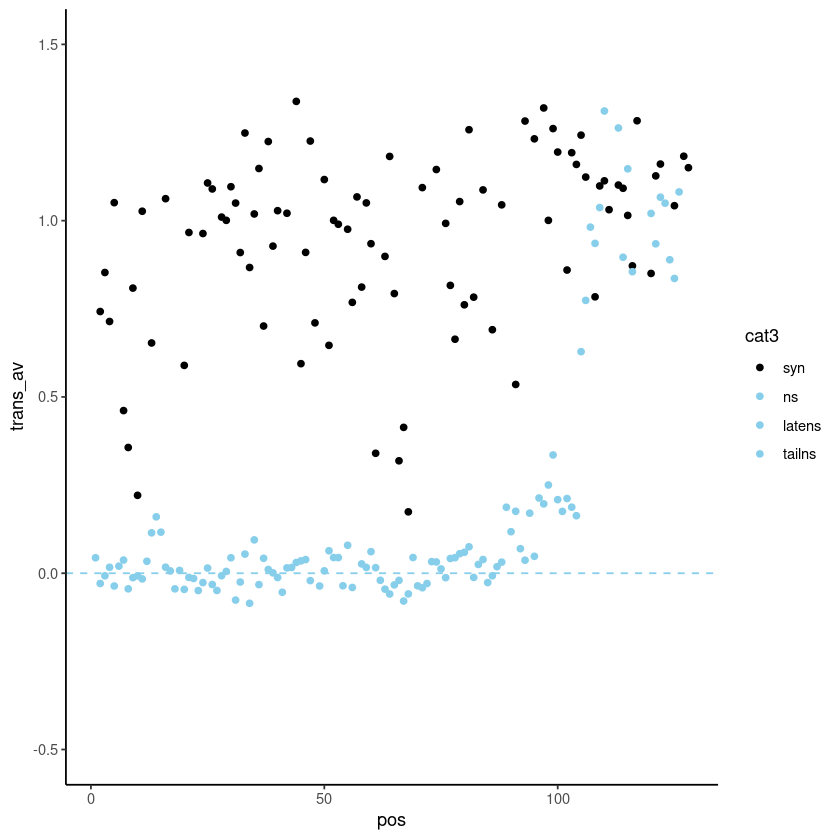

In [303]:
ggplot(scores1[scores1$cat=="syn",],aes(pos,trans_av,col=cat))+geom_point()+
    scale_color_manual(values=c("black"))+ylim(-0.5,1.5)+theme_classic()+
        geom_hline(yintercept = mean(scores1[scores1$cat=="syn",18],na.rm = T), lty=2)

ggplot(scores1[scores1$cat3!="ms",],aes(pos,trans_av,col=cat3))+geom_point()+
    scale_color_manual(values=c("black","skyblue","skyblue","skyblue"))+ylim(-0.5,1.5)+theme_classic()+
        geom_hline(yintercept = mean(scores1[scores1$cat=="syn",18],na.rm = T), lty=2, col="black")+
        geom_hline(yintercept = 0, lty=2, col="skyblue")


In [304]:
head(scores1)

,orig,pos,new,Seq11.adj,Seq12.adj,Seq13.adj,tot.adj,mutation,cat,cat2,score.time1.total,score.time2.total,score.time3.total,min,norm.ou1,norm.ou2,norm.ou3,cat3,trans_av,sd_av
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
1,A,114,A,80.18795,73.788849,81.0179386,861.7749,A114A,syn,syn,-3.272949,-3.379125,-3.259733,73.7888494,1.0658800,1.135423,1.074279,syn,1.091861,0.03795909
2,A,114,C,25.16091,36.221084,28.8960346,304.5937,A114C,ms,ms,-3.161446,-2.766867,-3.015795,25.1609122,1.0441021,1.013460,1.026503,ms,1.028022,0.01537724
3,A,114,D,50.76045,87.673598,6.3244151,406.8205,A114D,ms,ms,-2.778222,-2.093386,-4.674323,6.3244151,0.9692542,0.879302,1.351333,ms,1.066630,0.25062903
4,A,114,E,93.08740,37.799952,5.8882486,363.8276,A114E,ms,ms,-1.858505,-2.967292,-4.556341,5.8882486,0.7896231,1.053385,1.328226,ms,1.057078,0.26932047
5,A,114,F,37.86099,5.200976,0.8723331,149.7386,A114F,ms,ms,-1.738791,-3.393477,-3.876979,0.8723331,0.7662415,1.138282,1.195170,ms,1.033231,0.23296275
6,A,114,G,148.41349,37.846389,96.9380181,1154.8039,A114G,ms,ms,-2.878320,-4.605533,-3.445240,37.8463891,0.9888045,1.379725,1.110612,ms,1.159714,0.20003248


Warning message:
“Removed 40 rows containing missing values (geom_point).”
Warning message:
“Removed 40 rows containing missing values (geom_point).”


png 
  2

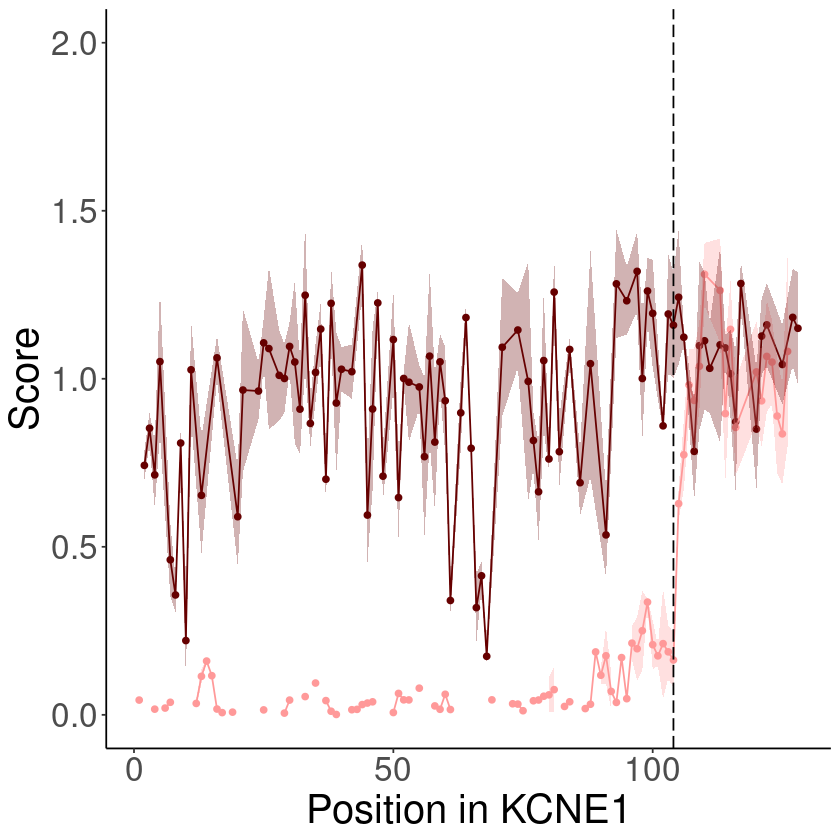

In [305]:
ggplot(scores1[scores1$cat =="syn" | scores1$cat =="ns",],
       aes(pos,trans_av, color =cat))+
    geom_point()+scale_color_manual(values=c("#FF9999", "#660000"))+geom_line()+
geom_ribbon(aes(ymin=trans_av+sd_av, ymax=trans_av-sd_av, fill=cat), alpha=0.3, colour=NA)+
ylim(0,2)+scale_fill_manual(values=c("#FF9999", "#660000"))+
theme_classic()+
geom_vline(xintercept=104, lty=5, color="black")+xlab("Position in KCNE1")+ylab("Score")+theme(axis.text = element_text(size = 20),
                                               axis.title.x=element_text(size=24),
                                               axis.title.y=element_text(size=24),legend.position = "none")

pdfName= paste("funcscores-allreps-synvns-",Sys.Date(),".pdf",sep="")

pdf(pdfName, useDingbats = F)
ggplot(scores1[scores1$cat =="syn" | scores1$cat =="ns",],
       aes(pos,trans_av, color =cat))+
    geom_point()+scale_color_manual(values=c("#FF9999", "#660000"))+geom_line()+
geom_ribbon(aes(ymin=trans_av+sd_av, ymax=trans_av-sd_av, fill=cat), alpha=0.3, colour=NA)+
ylim(0,2)+scale_fill_manual(values=c("#FF9999", "#660000"))+
theme_classic()+
geom_vline(xintercept=104, lty=5, color="black")+xlab("Position in KCNE1")+ylab("Score")+theme(axis.text = element_text(size = 20),
                                               axis.title.x=element_text(size=24),
                                               axis.title.y=element_text(size=24),legend.position = "none")

dev.off()

rm(pdfName)

In [306]:
colnames(scores1)[19]

[1] "trans_av"

In [314]:
heatmap_matrix = matrix(ncol=21,nrow=129)
 colnames(heatmap_matrix)= c("G","A","V","L","M","I","F","Y","W","S","T","C","P","N","Q","K","R","H",
                 "D","E","X")

df3 <- scores1
#head(heatmap_matrix)

for (i in c(1:128)){
    for (x1 in (1:21)){
      a = colnames(heatmap_matrix)[x1]
      scoreAA <- unlist(df3[df3$pos==i & df3$new==a, 19])
      if(length(scoreAA)==0)
          {
          scoreAA = NA
      }
      #print(paste(i,a,scoreAA,sep=" "))
      #print(heatmap_matrix[i,x1])
      heatmap_matrix[i,x1] <- as.numeric(scoreAA)-1
      
    }
  }

In [311]:
head(heatmap_matrix)

G,A,V,L,M,I,F,Y,W,S,...,C,P,N,Q,K,R,H,D,E,X
0.0460473,0.0631491,0.05836607,0.04567184,NA,0.0387865,0.01511639,0.00816156,0.05927992,0.06289104,...,0.03288283,0.01037173,0.01101048,0.06090052,0.1044523,0.05050097,-0.04761754,0.01678407,0.09426236,0.043869808
0.8508814,1.0375701,1.07223068,1.24686669,0.9012458,0.7422883,1.06209914,1.17889501,0.95979613,1.11513430,...,0.96718185,1.18047299,1.03927267,NA,1.0095607,0.94135950,NA,1.18510231,1.02008468,-0.029128574
0.7775874,0.9867511,1.11794599,0.85291828,0.5970263,0.8652558,1.12205390,1.11162111,1.15831301,1.17271095,...,1.02676787,1.06094998,0.97830867,1.04598521,1.1994316,0.90051487,1.04107175,0.93533982,1.09241129,-0.007304969
1.0156085,1.3190488,1.22366017,1.18504000,0.8709713,1.2075810,1.14333668,0.98641252,1.00075628,0.71400289,...,1.06489145,1.17801508,1.07945489,NA,0.9329377,1.24355766,1.05776657,1.08961590,0.97867295,0.016844898
0.8055579,0.7392132,0.73148256,0.87519924,0.7882718,0.8842844,1.02795579,0.79190417,0.83250261,0.87425422,...,1.09610170,0.95502452,1.05110552,0.74913298,0.8833303,0.98377375,0.57350385,1.08244879,1.24241057,-0.036292734
1.1421783,1.1542909,1.21491895,1.16564986,1.0752692,0.8350613,1.26037995,1.02313061,1.14568019,1.21097306,...,0.81367769,1.20523688,1.04893739,0.94444697,0.9114701,1.07957631,0.97962570,NA,1.16342468,0.020094390


In [312]:
library("RColorBrewer")

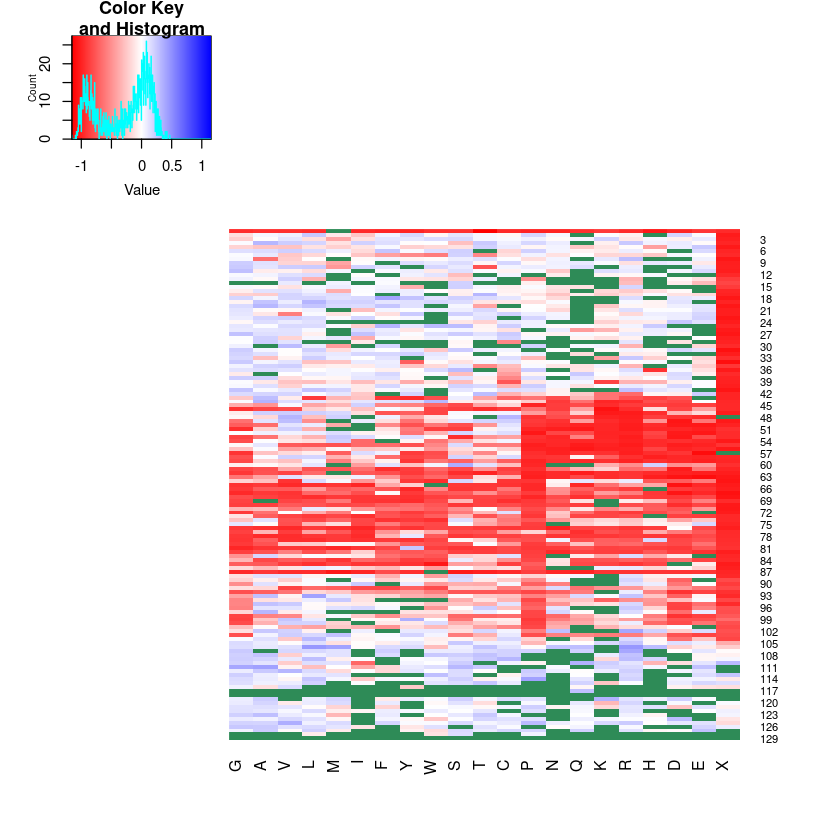

In [315]:
my_palette = colorRampPalette(c("red","white","blue"))(n=500)

heatmap.2(heatmap_matrix, Rowv=NA, Colv=NA, 
         sepcolor="black",
          trace="none", dendrogram = c("none"),
       na.color = "seagreen", col = my_palette)

G,A,V,L,M,I,F,Y,W,S,...,C,P,N,Q,K,R,H,D,E,X
NA,NA,NA,NA,.,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,.,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,.,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,.,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,.,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


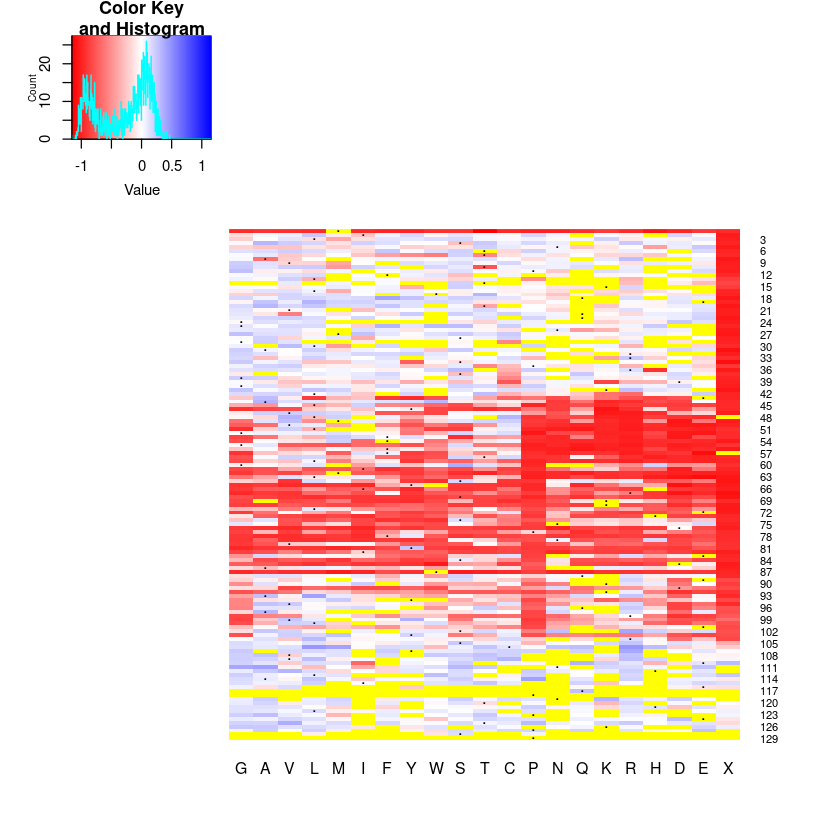

In [334]:
### the heatmap needs to be generated here

labs=matrix(nrow=129,,ncol=21)
colnames(labs)= c("G","A","V","L","M","I","F","Y","W","S","T","C","P","N","Q","K","R","H",
                 "D","E","X")


KCNE1 = "MILSNTTAVTPFLTKLWQETVQQGGNMSGLARRSPRSGDGKLEALYVLMVLGFFGFFTLGIMLSYIRSKKLEHSNDPFNVYIESDAWQEKDKAYVQARVLESYRSCYVVENHLAIEQPNTHLPETKPSP"

KCNE1 = unlist(strsplit(KCNE1,""))

for (i in 1:(length(KCNE1))){
    for (x1 in (1:21)){
      a = colnames(heatmap_matrix)[x1]
        if (KCNE1[i] == a){
             labs[i,x1] = "."    
        }
   }
}
#my_palette <- colorRampPalette(c("darkred","red","pink","white","blue"))(n=200)
head(labs)

heatmap.2(heatmap_matrix, Rowv=NA, Colv=NA, 
        scale="none",
         sepcolor="black",
          sepwidth=c(0.5,0.5),
          trace="none", dendrogram = c("none"),
        srtCol=0, adjCol = c(0.5,1), na.color = "YELLOW", col = my_palette,          
          cellnote=labs, notecol="black")


In [335]:
pdfName = paste("fitness-heatmap-",Sys.Date(),".pdf",sep="")

pdf(pdfName, useDingbats =F)
heatmap.2(heatmap_matrix, Rowv=NA, Colv=NA, 
        scale="none",
         sepcolor="black",
          sepwidth=c(0.5,0.5),
          trace="none", dendrogram = c("none"),
        srtCol=0, adjCol = c(0.5,1), na.color = "YELLOW", col = my_palette,          
          cellnote=labs, notecol="black")

dev.off()

png 
  2

In [316]:
syn_Score <- (scores1[scores1$cat=="syn",])

In [317]:
head(syn_Score)
summary(syn_Score)

sd(syn_Score$trans_av, na.rm = T)

lower_thresh = as.numeric(quantile(syn_Score$trans_av,c(0.025)))
upper_thresh = as.numeric(quantile(syn_Score$trans_av,c(0.975)))

quantile(syn_Score$trans_av,c(0.05,0.95))
quantile(syn_Score$trans_av,c(0.01,0.99))

,orig,pos,new,Seq11.adj,Seq12.adj,Seq13.adj,tot.adj,mutation,cat,cat2,score.time1.total,score.time2.total,score.time3.total,min,norm.ou1,norm.ou2,norm.ou3,cat3,trans_av,sd_av
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
1,A,114,A,80.18795,73.78885,81.017939,861.7749,A114A,syn,syn,-3.27294908,-3.3791255,-3.2597328,73.788849,1.0658800,1.1354231,1.0742792,syn,1.0918608,0.03795909
21,A,31,A,83.93617,11.05207,48.305447,402.5252,A31A,syn,syn,-2.13472964,-4.2924479,-2.8227797,11.052074,0.8435729,1.3173581,0.9886999,syn,1.0498770,0.24274491
42,A,44,A,28.25120,16.29949,17.065017,697.2824,A44A,syn,syn,-4.20870960,-4.7491799,-4.7077853,16.299488,1.2486446,1.4083397,1.3578871,syn,1.3382905,0.08163117
63,A,86,A,76.85841,186.91008,102.172017,289.6494,A86A,syn,syn,-1.78653803,-0.6057385,-1.4175627,76.858412,0.7755671,0.5829607,0.7134816,syn,0.6906698,0.09830861
83,A,8,A,339.35332,550.60691,448.978953,322.6084,A8A,syn,syn,0.07086243,0.7531651,0.4646036,339.353318,0.4127957,0.3122653,0.3448505,syn,0.3566372,0.05129118
102,A,93,A,10.90572,44.95129,5.942769,501.9717,A93A,syn,syn,-4.61409446,-3.2198388,-5.0050899,5.942769,1.3278209,1.1036929,1.4161156,syn,1.2825432,0.16105755


     orig                pos             new              Seq11.adj       
 Length:91          Min.   :  2.00   Length:91          Min.   :   1.236  
 Class :character   1st Qu.: 34.50   Class :character   1st Qu.:  24.603  
 Mode  :character   Median : 61.00   Mode  :character   Median :  52.495  
                    Mean   : 64.04                      Mean   : 175.148  
                    3rd Qu.: 97.50                      3rd Qu.: 142.452  
                    Max.   :128.00                      Max.   :4476.888  
                                                                          
   Seq12.adj          Seq13.adj           tot.adj         mutation        
 Min.   :   0.139   Min.   :   0.709   Min.   : 104.0   Length:91         
 1st Qu.:  29.093   1st Qu.:  15.757   1st Qu.: 310.8   Class :character  
 Median :  66.359   Median :  61.200   Median : 411.9   Mode  :character  
 Mean   : 179.192   Mean   : 178.442   Mean   : 516.1                     
 3rd Qu.: 154.172   3rd Q

[1] 0.2574695

5%       95% 
0.3851614 1.2595473

1%       99% 
0.2162379 1.3215483

In [318]:
scores1[scores1$mutation %in% c("G25V","G25G","G60D","G60G"),]


,orig,pos,new,Seq11.adj,Seq12.adj,Seq13.adj,tot.adj,mutation,cat,cat2,score.time1.total,score.time2.total,score.time3.total,min,norm.ou1,norm.ou2,norm.ou3,cat3,trans_av,sd_av
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
562,G,25,G,32.99628,74.76403,44.97968,600.9971,G25G,syn,syn,-3.828882,-2.849641,-3.4741952,32.99628,1.1744599,1.0299491,1.1162827,syn,1.1068973,0.07271112
574,G,25,V,108.77808,42.86162,16.90145,708.5536,G25V,ms,ms,-2.596827,-3.764803,-4.7393397,16.90145,0.9338257,1.2122506,1.3640672,ms,1.1700478,0.21820341
674,G,60,D,700.71745,348.27965,253.30373,488.9181,G60D,ms,ms,0.510473,-0.477717,-0.9220752,253.30373,0.3269348,0.5574587,0.6164380,ms,0.5002772,0.15298797
677,G,60,G,186.67323,117.57921,335.08496,1152.9289,G60G,syn,syn,-2.563890,-3.188298,-1.7527393,117.57921,0.9273928,1.0974099,0.7791275,syn,0.9346434,0.15926506


In [319]:
manual <- data.frame("mutation"=c("WT","I61X","G25V","G60D","D76N","G55X","F57Y","R98W","D85N","F53X",
                                "L3P","E19D","D39G","E101V","T125M","P127T"),
                    "I-20"=c(15.89,0,34.78,28.49,0.18,0.18,2.54,4.73,32.3,10.03,
                            4.8,6.69,43.9,9.08,2.99,4.8),
                    "I0"=c(48.56,0.03,87.4,71.5,3.19,0.19,14.86,15.26,117.22,41.94,
                          30.3,25.07,112.5,22.39,9.36,13.1),
                    "I20"=c(92.1,0.01,156.1,114.9,10.1,0.20,48.78,31.72,215.59,91.23,
                           79.9,52.15,185.1,33.38,20.43,22.7),
                    "cell"=c(rep("HEK",8),rep("CHO",3),rep("HEK",4),"CHO"))

In [320]:
comp <- inner_join(manual,scores1)

Joining, by = "mutation"



In [321]:
head(comp)

,mutation,I.20,I0,I20,cell,orig,pos,new,Seq11.adj,Seq12.adj,...,score.time1.total,score.time2.total,score.time3.total,min,norm.ou1,norm.ou2,norm.ou3,cat3,trans_av,sd_av
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
1,I61X,0.00,0.03,0.01,HEK,I,61,X,795.1606,1206.58003,...,1.640273,2.235756,2.6135786,795.16059,0.10627210,0.01693138,-0.07603639,latens,0.015722363,0.09116026
2,G25V,34.78,87.40,156.10,HEK,G,25,V,108.7781,42.86162,...,-2.596827,-3.764803,-4.7393397,16.90145,0.93382574,1.21225061,1.36406717,ms,1.170047840,0.21820341
3,G60D,28.49,71.50,114.90,HEK,G,60,D,700.7174,348.27965,...,0.510473,-0.477717,-0.9220752,253.30373,0.32693481,0.55745869,0.61643800,ms,0.500277168,0.15298797
4,D76N,0.18,3.19,10.10,HEK,D,76,N,575.9496,851.75272,...,1.920467,2.476964,2.4696872,575.94963,0.05154706,-0.03111765,-0.04785459,ms,-0.009141723,0.05322009
5,G55X,0.18,0.19,0.20,HEK,G,55,X,916.8979,981.21988,...,1.925025,2.021820,1.5737110,716.56714,0.05065669,0.05954762,0.12762655,ns,0.079276957,0.04210730
6,F57Y,2.54,14.86,48.78,HEK,F,57,Y,797.5730,805.22256,...,1.579494,1.593095,1.7788723,797.57300,0.11814294,0.14495021,0.08744476,ms,0.116845970,0.02877466


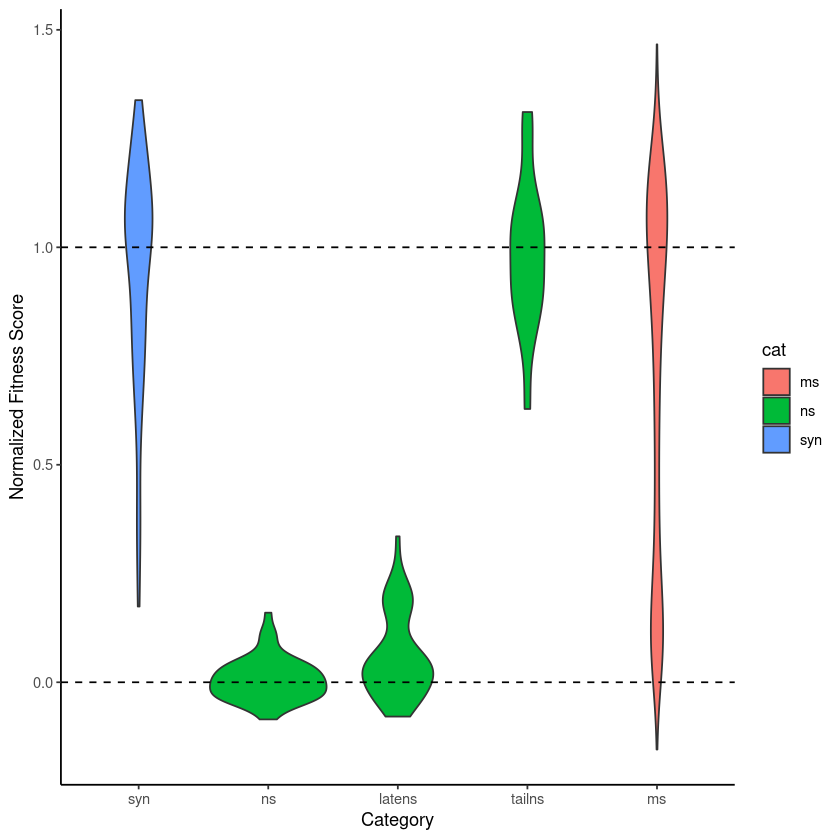

In [322]:
ggplot(scores1,aes(cat3,trans_av, fill=cat))+geom_violin()+theme_classic()+
    geom_hline(yintercept = c(0,1), lty=2)+xlab("Category")+ylab("Normalized Fitness Score")

In [323]:
`%ni%` <- Negate(`%in%`)

There is some selection somewhere - P127T shows up as "normal function" when the individual flow shows that that is not possible

In [325]:
scores1[scores1$mutation=="T125M",]
scores1[scores1$mutation=="L51H",]

,orig,pos,new,Seq11.adj,Seq12.adj,Seq13.adj,tot.adj,mutation,cat,cat2,score.time1.total,score.time2.total,score.time3.total,min,norm.ou1,norm.ou2,norm.ou3,cat3,trans_av,sd_av
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
2067,T,125,M,7.257189,26.51569,0.4361666,226.0154,T125M,ms,ms,-3.773612,-2.692293,-4.499218,0.4361666,1.163665,0.9986051,1.317038,ms,1.159769,0.1592522


,orig,pos,new,Seq11.adj,Seq12.adj,Seq13.adj,tot.adj,mutation,cat,cat2,score.time1.total,score.time2.total,score.time3.total,min,norm.ou1,norm.ou2,norm.ou3,cat3,trans_av,sd_av
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
1198,L,51,H,797.2341,1300.848,1350.808,251.6962,L51H,ms,ms,1.625094,2.324535,2.378498,797.2341,0.1092367,-0.0007536377,-0.02999484,ms,0.02616273,0.07341473


`geom_smooth()` using formula 'y ~ x'



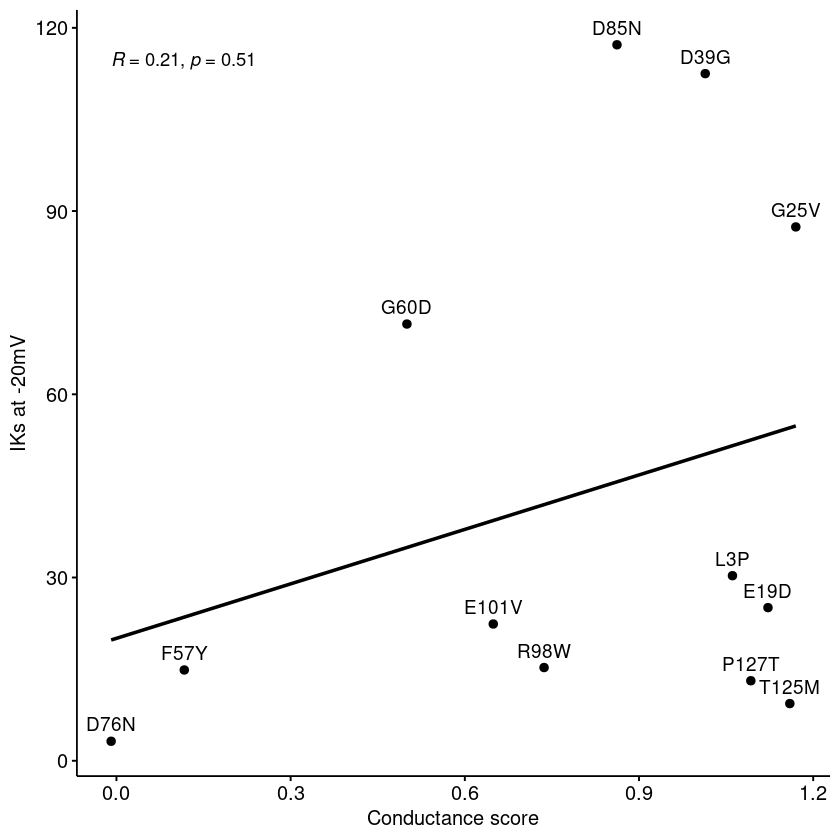

In [326]:
ggscatter(comp[comp$cat=="ms",], x="trans_av",y="I0", 
          add = "reg.line", conf.int = FALSE, label="mutation",
          cor.coef = TRUE, cor.method = "spearman",
          xlab = "Conductance score", ylab = "IKs at -20mV")

### end of date 07/12/22

`geom_smooth()` using formula 'y ~ x'



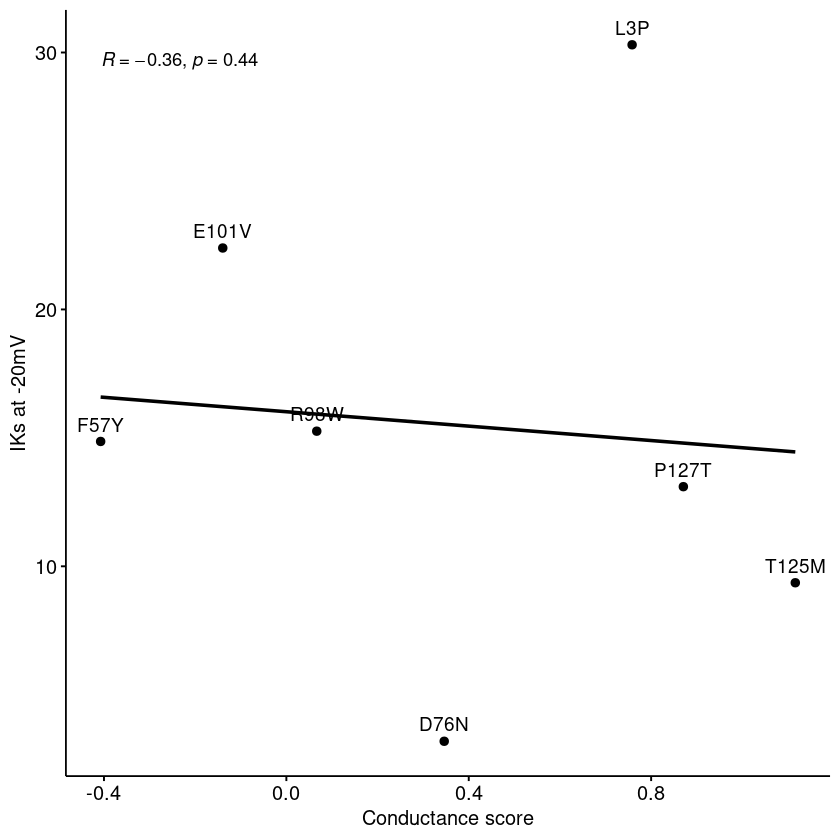

In [71]:
ggscatter(comp[comp$cat=="ms" & comp$mutation %ni% c("G60D","G25V","D39G","D85N"),], x="norm.ou",y="I0", 
          add = "reg.line", conf.int = FALSE, label="mutation",
          cor.coef = TRUE, cor.method = "spearman",
          xlab = "Conductance score", ylab = "IKs at -20mV")

In [72]:
manual

mutation,I.20,I0,I20,cell
<chr>,<dbl>,<dbl>,<dbl>,<chr>
WT,15.89,48.56,92.10,HEK
I61X,0.00,0.03,0.01,HEK
G25V,34.78,87.40,156.10,HEK
G60D,28.49,71.50,114.90,HEK
D76N,0.18,3.19,10.10,HEK
G55X,0.18,0.19,0.20,HEK
F57Y,2.54,14.86,48.78,HEK
R98W,4.73,15.26,31.72,HEK
D85N,32.30,117.22,215.59,CHO


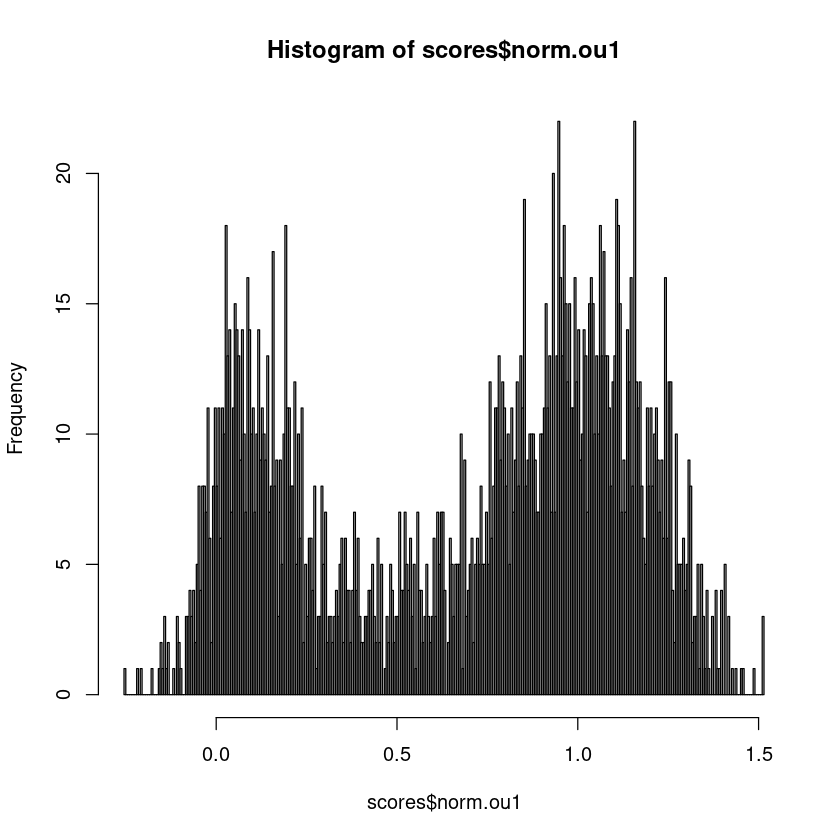

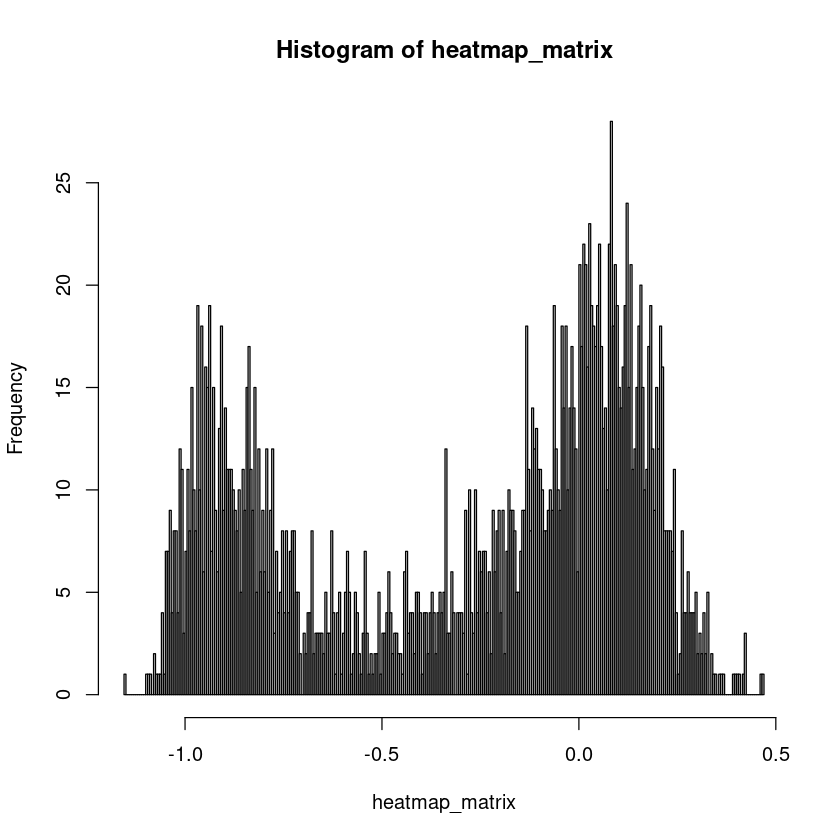

In [328]:
hist(scores$norm.ou1, breaks=500)
hist(heatmap_matrix, breaks=500)

In [76]:
head(heatmap_matrix)

G,A,V,L,M,I,F,Y,W,S,...,C,P,N,Q,K,R,H,D,E,X
-1.1331855,-0.254062487,-0.1358126,-0.1273472,NA,0.3317773,-0.65068719,NA,-1.09768202,NA,...,NA,-1.3561320,NA,NA,-0.4313731,-1.0567823,NA,-0.23653835,-0.90666814,-1.1676085
-0.2627089,-0.001489906,-0.7220700,0.6613810,-0.0009042954,-0.9486267,-0.09628253,NA,NA,-0.33448842,...,NA,-0.9507647,0.10267263,0.3984593,NA,-0.3339807,NA,0.05014051,0.05791623,-1.2360955
-0.3291629,0.378388643,0.3321908,-0.5337418,-1.6402707361,NA,0.31293011,0.48896148,0.12423611,1.03544939,...,NA,-0.2417295,0.76330549,-0.3348669,0.2481263,0.2407730,-0.5859825,-0.40579387,-0.34795385,NA
-0.7398876,0.602673251,0.2661918,1.1320928,0.0366659104,0.4367598,-0.03971673,-1.40500253,-1.34626449,-0.75962585,...,0.5342433,0.5431455,0.50937001,0.4254795,-0.2362711,0.7653521,0.4246534,0.61669848,-0.61253975,-0.7856269
-0.5752086,NA,0.3049238,0.5887513,-1.0997421118,-0.3229280,0.23645441,-0.04083532,0.05896977,-0.47838046,...,NA,NA,0.15377369,NA,-1.3323348,0.6919619,-0.3874131,-0.29799262,-0.29525160,NA
-0.8076684,0.380646027,NA,0.4247560,0.5673603752,NA,NA,0.28538180,-1.54099401,-0.00444596,...,NA,-0.1575357,-0.04611545,-0.2224941,0.6284399,0.7481821,NA,NA,NA,NA


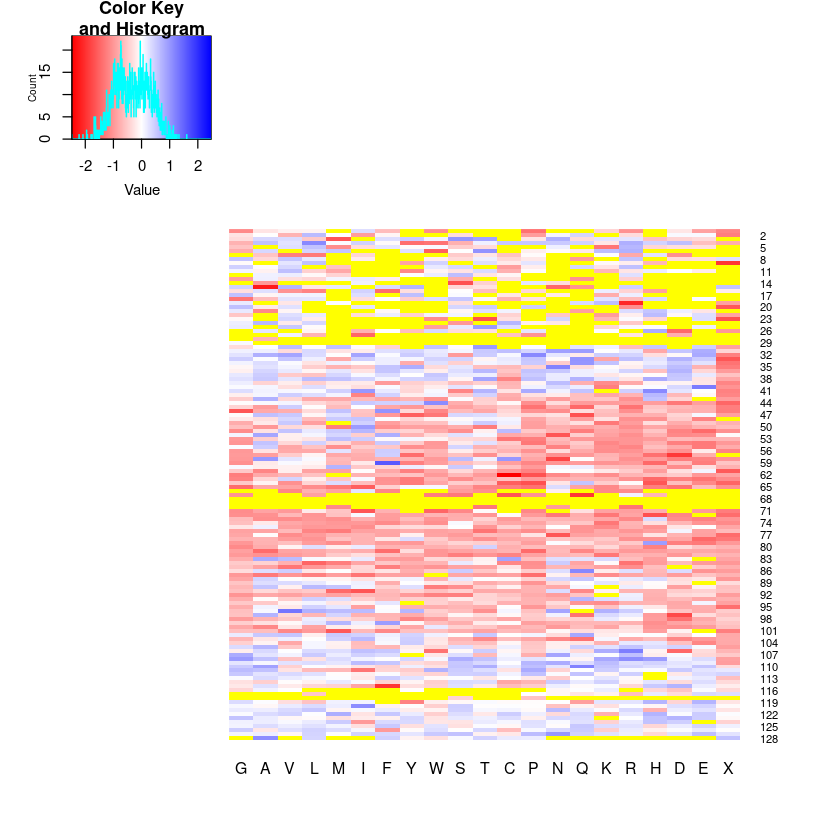

In [78]:
heatmap.2(heatmap_matrix, Rowv=NA, Colv=NA, 
        scale="none",
         sepcolor="black",
          sepwidth=c(0.5,0.5),
          trace="none", dendrogram = c("none"),
        srtCol=0, adjCol = c(0.5,1), na.color = "YELLOW", col = my_palette)

In [79]:
heatmap_matrix[60,]


G           A           V           L           M           I 
 0.05451236 -0.17771481 -0.14182508 -0.19437456  0.72223007 -0.52919007 
          F           Y           W           S           T           C 
-0.41934770  0.17684625 -0.07338039  0.50569958  0.03197075 -0.60917722 
          P           N           Q           K           R           H 
-0.97670168  0.07840467  0.16804864 -0.61877086 -0.67128891 -0.70683511 
          D           E           X 
-1.11661220 -0.30059658 -0.74865402

In [82]:
labs=matrix(nrow=128,,ncol=21)
colnames(labs)= c("G","A","V","L","M","I","F","Y","W","S","T","C","P","N","Q","K","R","H",
                 "D","E","X")


KCNE1 = "MILSNTTAVTPFLTKLWQETVQQGGNMSGLARRSPRSGDGKLEALYVLMVLGFFGFFTLGIMLSYIRSKKLEHSNDPFNVYIESDAWQEKDKAYVQARVLESYRSCYVVENHLAIEQPNTHLPETKPSP"

KCNE1 = unlist(strsplit(KCNE1,""))

for (i in 1:(length(KCNE1)-1)){
    for (x1 in (1:21)){
      a = colnames(heatmap_matrix)[x1]
        if (KCNE1[i] == a){
             labs[i,x1] = "."    
        }
   }
}
#my_palette <- colorRampPalette(c("darkred","red","pink","white","blue"))(n=200)
head(labs)


pdf("fitness_v1.pdf",useDingbats = F)

heatmap.2(heatmap_matrix, Rowv=NA, Colv=NA, 
        scale="none",
         sepcolor="black",
          sepwidth=c(0.5,0.5),
          trace="none", dendrogram = c("none"),
        srtCol=0, adjCol = c(0.5,1), na.color = "YELLOW", col = my_palette,          
          cellnote=labs, notecol="black")

dev.off()

G,A,V,L,M,I,F,Y,W,S,...,C,P,N,Q,K,R,H,D,E,X
NA,NA,NA,NA,.,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,.,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,.,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,.,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,.,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


png 
  2

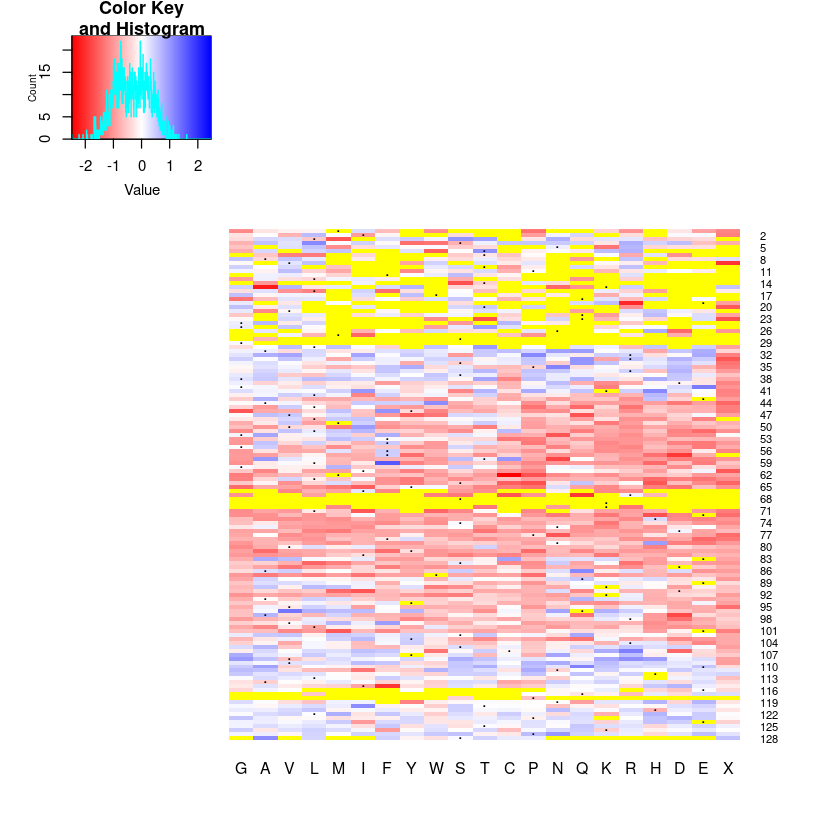

In [83]:
heatmap.2(heatmap_matrix, Rowv=NA, Colv=NA, 
        scale="none",
         sepcolor="black",
          sepwidth=c(0.5,0.5),
          trace="none", dendrogram = c("none"),
        srtCol=0, adjCol = c(0.5,1), na.color = "YELLOW", col = my_palette,          
          cellnote=labs, notecol="black")


In [222]:
head(df1)

bc,time1,time2,time3,Count_4564,Count_5013,totalCount,mut,time1.adj,time2.adj,time3.adj,tot.adj
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
CCATGATTTCTGTGTTCG,5,1295,650,1978,2603,4581,K135V,0.02281612,8.295318,4.33435601,11.731538
CAAATGCCAATTACGCAT,599,1524,188,1133,1300,2433,NA,2.73337097,9.762213,1.25362912,6.230699
GTCTATGCCGCAAGGGTT,4775,1407,2345,5394,4227,9621,NA,21.78939295,9.012751,15.63702284,24.638535
TCCGAGCCCAGAAGTAAA,810,1032,3177,603,351,954,R45H,3.69621116,6.610632,21.18499853,2.443110
CCGCCATGGGGGTATCGC,1164,395,6,522,706,1228,NA,5.31159233,2.530232,0.04000944,3.144800
ACTTTAACACGAAGCGTG,3,698,5,529,602,1131,S83F,0.01368967,4.471145,0.03334120,2.896392


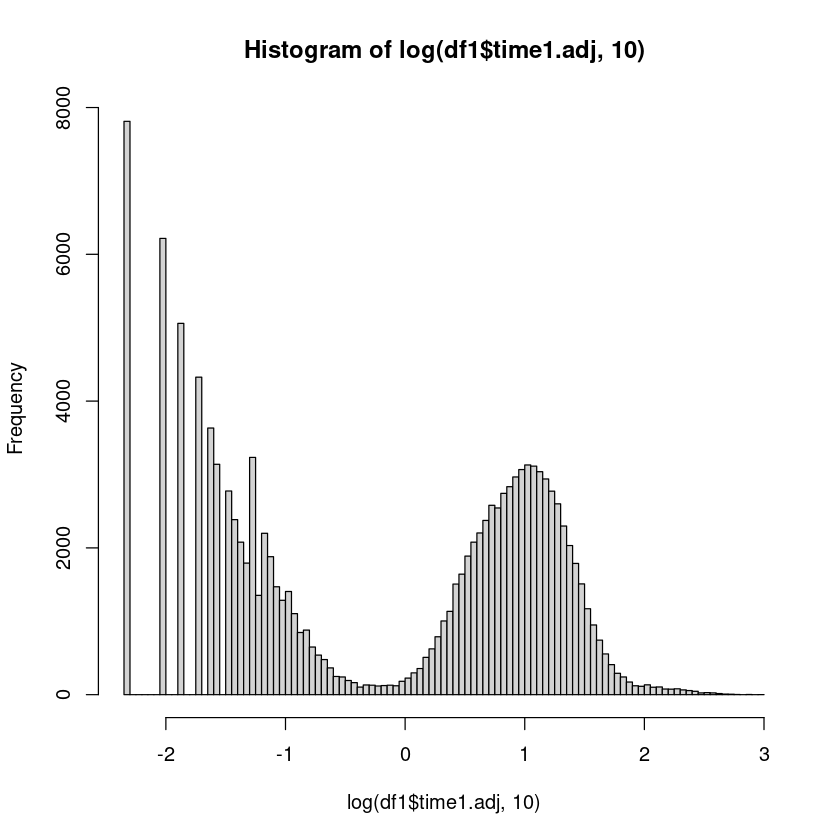

In [181]:
hist(log(df1$time1.adj,10),breaks=100)

In [182]:
nrow(df1[df1$time1.adj>1,])

[1] 64202

In [252]:
head(df3)

,orig,pos,new,time1.adj,time2.adj,time3.adj,tot.adj,mutation,cat,score.time1.total,score.time2.total,score.time3.total,pos_corr,norm.ou
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A,102,A,267.19956,219.56651,251.5860,411.8100,A102A,syn,-0.60566842,-0.877681200,-0.6893079,93,0.9631843
2,A,102,C,110.51671,189.94037,164.6789,180.5289,A102C,ms,-0.66077688,0.069559697,-0.1253051,93,0.5384346
3,A,102,D,156.62353,258.35273,211.7833,190.8212,A102D,ms,-0.26931977,0.418218681,0.1432389,93,0.3361945
4,A,102,E,82.02395,81.96031,178.0153,134.5759,A102E,ms,-0.65174617,-0.652744168,0.3790230,93,0.1586258
5,A,102,F,655.88583,338.09668,375.2285,336.1632,A102F,ms,0.94382228,0.008035509,0.1542620,93,0.3278930
6,A,102,G,454.71611,409.61578,591.6196,475.3155,A102G,ms,-0.06257335,-0.209854084,0.3099285,93,0.2106607


In [179]:
traffic <- fread("/scratch2/muhama1/6436-AM/allreps-norm-postQC-dist-2022-01-13_withCI.txt",
                header=T, stringsAsFactors=F)

In [254]:
head(traffic)

orig,pos_corr,new,cat_ns,trans_repA,trans_rep2,trans_rep3,trans_av,sd_av,count,sem,variants,CI_lower,CI_upper
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>
A,8,C,missense,1.2384096,1.576771,1.3700425,1.3950743,0.1705639,3,0.09847511,A8C,1.2020631,1.588086
A,8,E,missense,1.0225342,0.559338,1.5492353,1.0437025,0.4952880,3,0.28595468,A8E,0.4832314,1.604174
A,8,G,missense,0.7998634,1.118084,1.1553984,1.0244485,0.1953892,3,0.11280803,A8G,0.8033447,1.245552
A,8,S,missense,0.8215317,0.887796,1.0392568,0.9161949,0.1116061,3,0.06443582,A8S,0.7899007,1.042489
A,8,T,missense,0.6952661,1.037872,0.9376089,0.8902492,0.1761448,3,0.10169725,A8T,0.6909226,1.089576
A,8,W,missense,1.1458088,1.199093,0.8787825,1.0745613,0.1716298,3,0.09909051,A8W,0.8803439,1.268779


In [290]:
names(traffic)

[1] "orig"       "pos_corr"   "new"        "cat_ns"     "trans_repA"
 [6] "trans_rep2" "trans_rep3" "trans_av"   "sd_av"      "count"     
[11] "sem"        "variants"   "CI_lower"   "CI_upper"   "mutation"

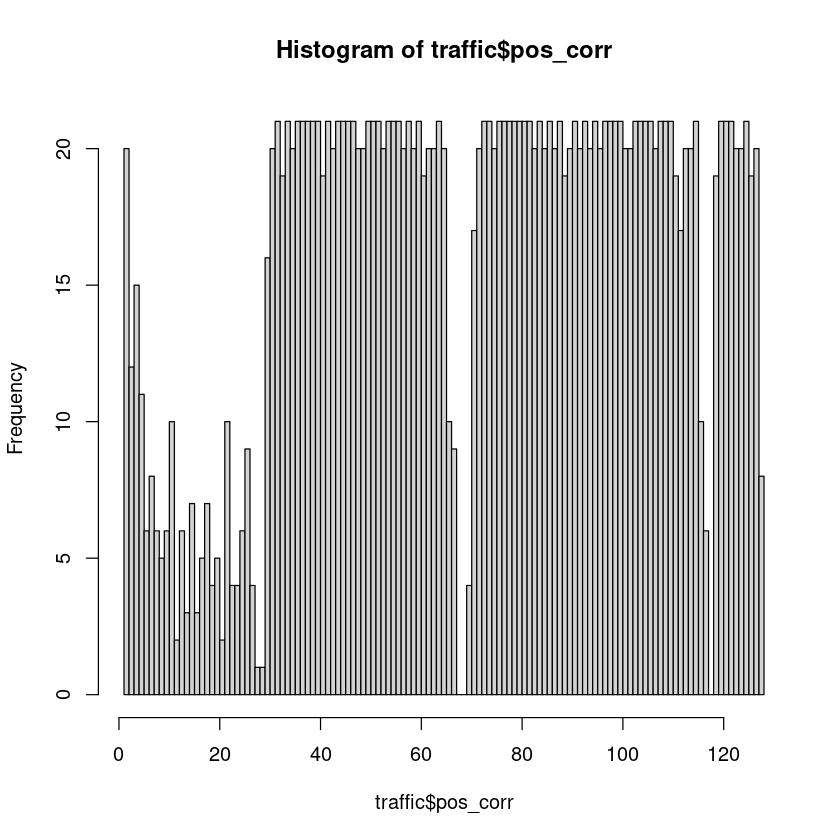

In [180]:
hist(traffic$pos_corr, breaks=129)
# pos_corr for traffic is correct 

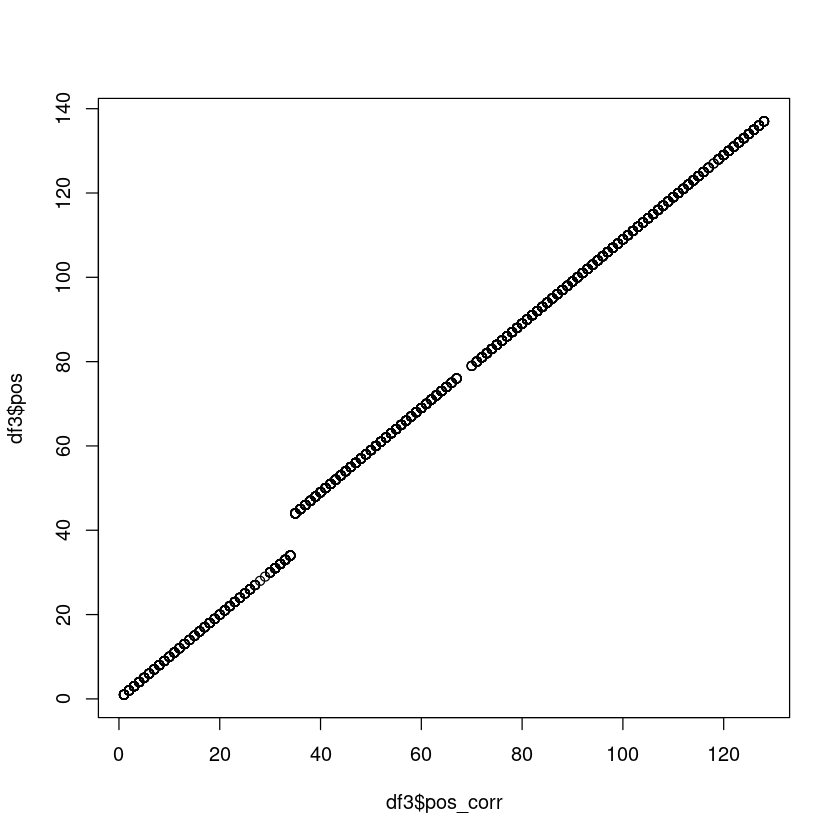

In [181]:
plot(df3$pos~df3$pos_corr)

In [182]:
df3$mutation = paste(df3$orig, df3$pos_corr, df3$new, sep="")

In [183]:
traffic$mutation = paste(traffic$orig,traffic$pos_corr,traffic$new,sep="")

In [184]:
head(traffic)

orig,pos_corr,new,cat_ns,trans_repA,trans_rep2,trans_rep3,trans_av,sd_av,count,sem,variants,CI_lower,CI_upper,mutation
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
A,8,C,missense,1.2384096,1.576771,1.3700425,1.3950743,0.1705639,3,0.09847511,A8C,1.2020631,1.588086,A8C
A,8,E,missense,1.0225342,0.559338,1.5492353,1.0437025,0.4952880,3,0.28595468,A8E,0.4832314,1.604174,A8E
A,8,G,missense,0.7998634,1.118084,1.1553984,1.0244485,0.1953892,3,0.11280803,A8G,0.8033447,1.245552,A8G
A,8,S,missense,0.8215317,0.887796,1.0392568,0.9161949,0.1116061,3,0.06443582,A8S,0.7899007,1.042489,A8S
A,8,T,missense,0.6952661,1.037872,0.9376089,0.8902492,0.1761448,3,0.10169725,A8T,0.6909226,1.089576,A8T
A,8,W,missense,1.1458088,1.199093,0.8787825,1.0745613,0.1716298,3,0.09909051,A8W,0.8803439,1.268779,A8W


In [193]:
df4 <- full_join(scores,traffic, by="mutation")

In [194]:
nrow(df4)

[1] 2262

In [195]:
names(df3)

print("")
names(traffic)

[1] "orig"              "pos"               "new"              
 [4] "time1.adj"         "time2.adj"         "time3.adj"        
 [7] "tot.adj"           "mutation"          "cat"              
[10] "score.time1.total" "score.time2.total" "score.time3.total"
[13] "pos_corr"          "norm.ou"

[1] ""


[1] "orig"       "pos_corr"   "new"        "cat_ns"     "trans_repA"
 [6] "trans_rep2" "trans_rep3" "trans_av"   "sd_av"      "count"     
[11] "sem"        "variants"   "CI_lower"   "CI_upper"   "mutation"

In [187]:
head(df4)
# pos variable is unadjusted in the functional database

,orig.x,pos,new.x,time1.adj,time2.adj,time3.adj,tot.adj,mutation,cat,score.time1.total,...,trans_repA,trans_rep2,trans_rep3,trans_av,sd_av,count,sem,variants,CI_lower,CI_upper
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>
1,A,102,A,267.19956,219.56651,251.5860,411.8100,A93A,syn,-0.60566842,...,0.9124303,1.0000000,0.9742561,0.9622288,0.04500672,3,0.02598464,A93A,0.9112989,1.0131587
2,A,102,C,110.51671,189.94037,164.6789,180.5289,A93C,ms,-0.66077688,...,0.7904929,0.9111644,0.8888331,0.8634968,0.06420159,3,0.03706681,A93C,0.7908459,0.9361478
3,A,102,D,156.62353,258.35273,211.7833,190.8212,A93D,ms,-0.26931977,...,1.1175523,1.1835996,1.2056765,1.1689428,0.04585398,3,0.02647381,A93D,1.1170541,1.2208315
4,A,102,E,82.02395,81.96031,178.0153,134.5759,A93E,ms,-0.65174617,...,1.1919076,1.2280497,1.2715515,1.2305029,0.03987861,3,0.02302393,A93E,1.1853760,1.2756298
5,A,102,F,655.88583,338.09668,375.2285,336.1632,A93F,ms,0.94382228,...,0.6853940,0.5292791,0.7762455,0.6636396,0.12491216,3,0.07211807,A93F,0.5222881,0.8049910
6,A,102,G,454.71611,409.61578,591.6196,475.3155,A93G,ms,-0.06257335,...,0.9873479,1.0731725,0.9807619,1.0137608,0.05155734,3,0.02976664,A93G,0.9554182,1.0721034


In [272]:
colnames(df4)

[1] "orig.x"            "pos"               "new.x"            
 [4] "time1.adj"         "time2.adj"         "time3.adj"        
 [7] "tot.adj"           "mutation"          "cat"              
[10] "score.time1.total" "score.time2.total" "score.time3.total"
[13] "pos_corr.x"        "norm.ou"           "orig.y"           
[16] "pos_corr.y"        "new.y"             "cat_ns"           
[19] "trans_repA"        "trans_rep2"        "trans_rep3"       
[22] "trans_av"          "sd_av"             "count"            
[25] "sem"               "variants"          "CI_lower"         
[28] "CI_upper"

In [189]:
head(df4$cat)
head(df4$cat_ns)

[1] "syn" "ms"  "ms"  "ms"  "ms"  "ms"

[1] "synonymous" "missense"   "missense"   "missense"   "missense"  
[6] "missense"

In [196]:
df4_ms <- df4[df4$cat=="ms",]

Warning message:
“Removed 178 rows containing missing values (geom_point).”


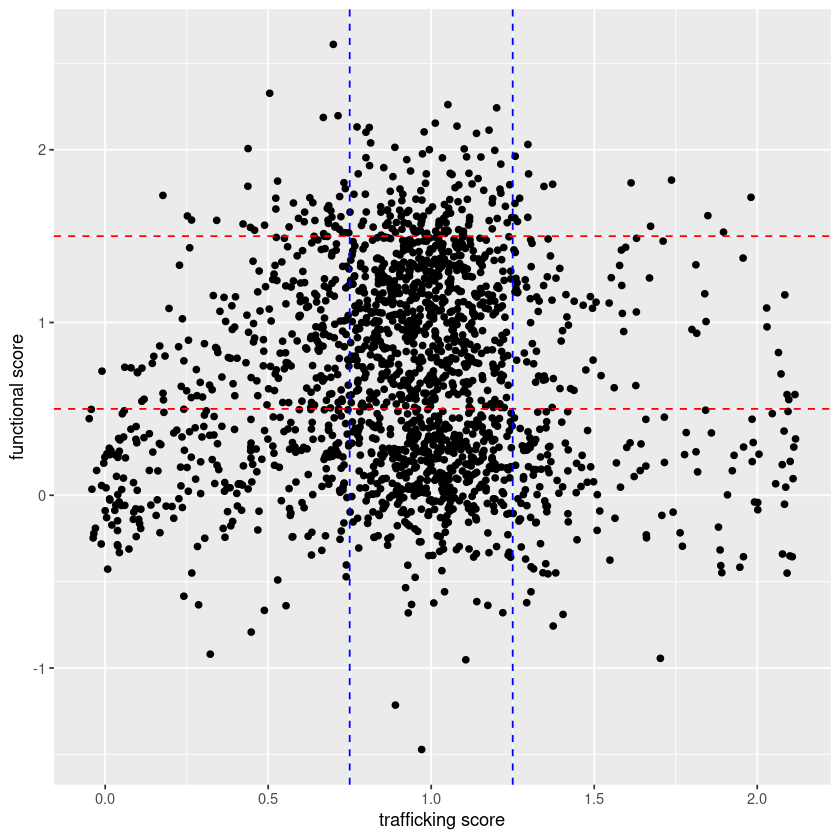

In [201]:
ggplot(df4_ms,aes(trans_av,norm.ou))+geom_point()+xlab("trafficking score")+
    ylab("functional score")+geom_hline(yintercept = c(0.5,1.5),col="red",lty=2)+
        geom_vline(xintercept = c(0.75,1.25),col="blue",lty=2)

In [311]:
fileName = paste("funcscores-rep1-norm-",Sys.Date(),".txt",sep="")
fwrite(df3,fileName, quote = F, row.names = F, sep ="\t")
rm(fileName)

In [309]:
colnames(df4_ms)

[1] "orig.x"            "pos"               "new.x"            
 [4] "time1.adj"         "time2.adj"         "time3.adj"        
 [7] "tot.adj"           "mutation"          "cat"              
[10] "score.time1.total" "score.time2.total" "score.time3.total"
[13] "pos_corr.x"        "norm.ou"           "orig.y"           
[16] "pos_corr.y"        "new.y"             "cat_ns"           
[19] "trans_repA"        "trans_rep2"        "trans_rep3"       
[22] "trans_av"          "sd_av"             "count"            
[25] "sem"               "variants"          "CI_lower"         
[28] "CI_upper"

Warning message:
“Removed 178 rows containing missing values (geom_point).”


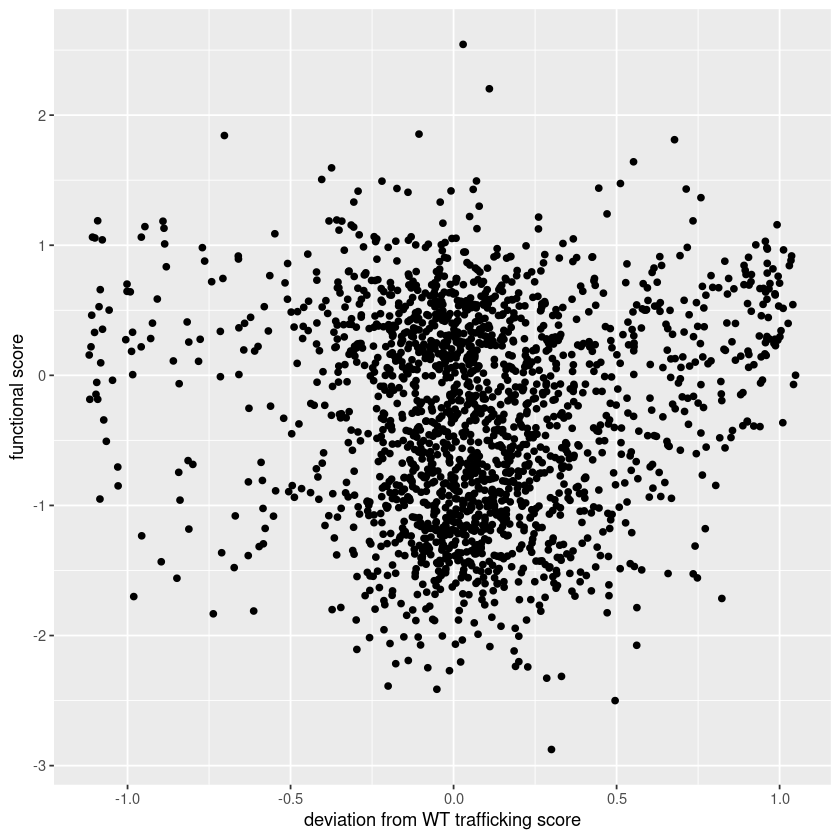

In [308]:
ggplot(df4_ms,aes(1-trans_av,score.time3.total))+geom_point()+xlab("deviation from WT trafficking score")+
    ylab("functional score")